In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.37'

In [4]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')
Group1_np_y=joblib.load('Group1_np.sav')
Group1_df=joblib.load('Group1_df.sav')

In [5]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [6]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## Now load the files of interest

In [7]:
Diad_Files_Weak =Group1_df['filename']
Diad_Files_Weak[0:5]

28    POC35.txt
29    POC36.txt
30    POC37.txt
31    POC38.txt
32    POC39.txt
Name: filename, dtype: object

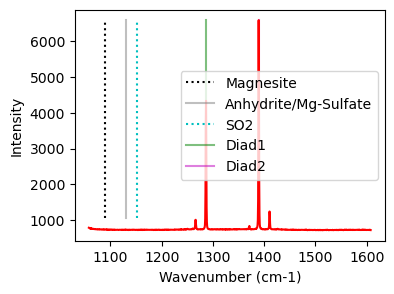

In [8]:
i=0
plot1=pf.plot_diad(Spectra_x=np_x, Spectra_y=Group1_np_y[:, i])

## Decide if you want a secondary peak
- If you dont have the peak, it is only a little slower, but it works if it only appears in a small number of spectra still

In [9]:
# Decide if you want to fit a carbonate peak or not here. 
fit_sec_peak=False

if fit_sec_peak is True:

    # Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
    generic_Config=pf.generic_peak_config(lower_bck=(1110, 1130), 
    upper_bck=(1160, 1180), cent_generic=1150, name='SO2')

    generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
    filename=filename_Weak, filetype=filetype)
    generic_fit

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [10]:
## Choose a model - option, pseudovoigt or voigt
model_name='PseudoVoigtModel'
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=2
n_peaks_diad2=3

## Fit Diad 1
- You can tweak the parameters in diad1_fit_config

In [11]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name,
N_poly_bck_diad1=3, lower_bck_diad1=(1180, 1220),
upper_bck_diad1=(1330, 1350),
diad_sigma=1,
x_range_residual=10, x_range_baseline=30, 
 y_range_baseline=1000, 
    HB_amplitude=Group1_df['HB1_prom'].iloc[i], 
    diad_amplitude=Group1_df['Diad1_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, N_poly_bck_diad1=3, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1330, 1350), diad_amplitude=3595.333496, HB_amplitude=280.0, x_range_baseline=30, y_range_baseline=1000, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

In [12]:
Spectra_x=np_x
Spectra_y=Group1_np_y[:, i]

In [20]:
Group1_df['HB1_pos'].iloc[12]

1266.314725

In [ ]:
# Need a function here that auto chooses number if it has a hotband. 
No, completely redo the function which allocates based on peak_pos_voigt.

In [ ]:
for in range(0, len(Group1_df):
    

In [22]:
i=15
diad1_peaks=(Group1_df['Diad1_pos'].iloc[i], Group1_df['HB1_pos'].iloc[i])
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=Group1_df['filename'].iloc[i], filetype=filetype, close_figure=False)
Diad1_fit

ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [17]:
### Now lets update the tweakable parameters with the sigma values
diad1_fit_config=diad1_fit_config_init
diad1_fit_config.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]
diad1_fit_config.diad_amplitude=Diad1_fit['Diad1_Voigt_Area'][0]
diad1_fit_config.HB_amplitude=Diad1_fit['HB1_Area'][0]
diad1_fit_config.sigma_allowance=2
diad1_fit_config

diad1_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=1287, gauss_sigma=10.0, gauss_amp=3000, diad_sigma=1.0730600588754, sigma_allowance=2, N_poly_bck_diad1=3, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1330, 1350), diad_amplitude=87723.97808798128, HB_amplitude=12917.92108907401, x_range_baseline=30, y_range_baseline=1000, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

## Fit diad 2

In [18]:
diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    peak_pos_gauss=1385, lower_bck_diad2=(1310, 1340),
    gauss_sigma=20,                                          
diad_sigma=1,  N_poly_bck_diad2=3,
HB_amplitude=10000,                                          
x_range_residual=30, y_range_baseline=1000, 
diad_amplitude=100000, 
x_range_baseline=30)
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=1385, gauss_sigma=20, gauss_amp=3000, diad_sigma=1, C13_sigma=0.1, sigma_allowance=10, N_poly_bck_diad2=3, lower_bck_diad2=(1310, 1340), upper_bck_diad2=(1440, 1470), diad_amplitude=100000, HB_amplitude=10000, x_range_baseline=30, y_range_baseline=1000, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_Voigt_Area  Diad2_Voigt_Sigma  \
0          1386.838471       1386.838421     167097.251156            1.02147   

  Diad2_Voigt_Gamma     HB2_Cent     HB2_Area     C13_Cent     C13_Area  \
0              None  1408.003837  19693.22587  1369.576195  2403.251335   

   Diad2_Combofit_Height  Residual_Diad2  Diad2_Prop_Lor  Diad2_fwhm  \
0           57339.211339       95.244839        0.789938     2.04294   

    Gauss_Cent    Gauss_Area  Gauss_Sigma        Diad2_refit  
0  1376.287907  11186.486023   199.522784  Flagged Warnings:

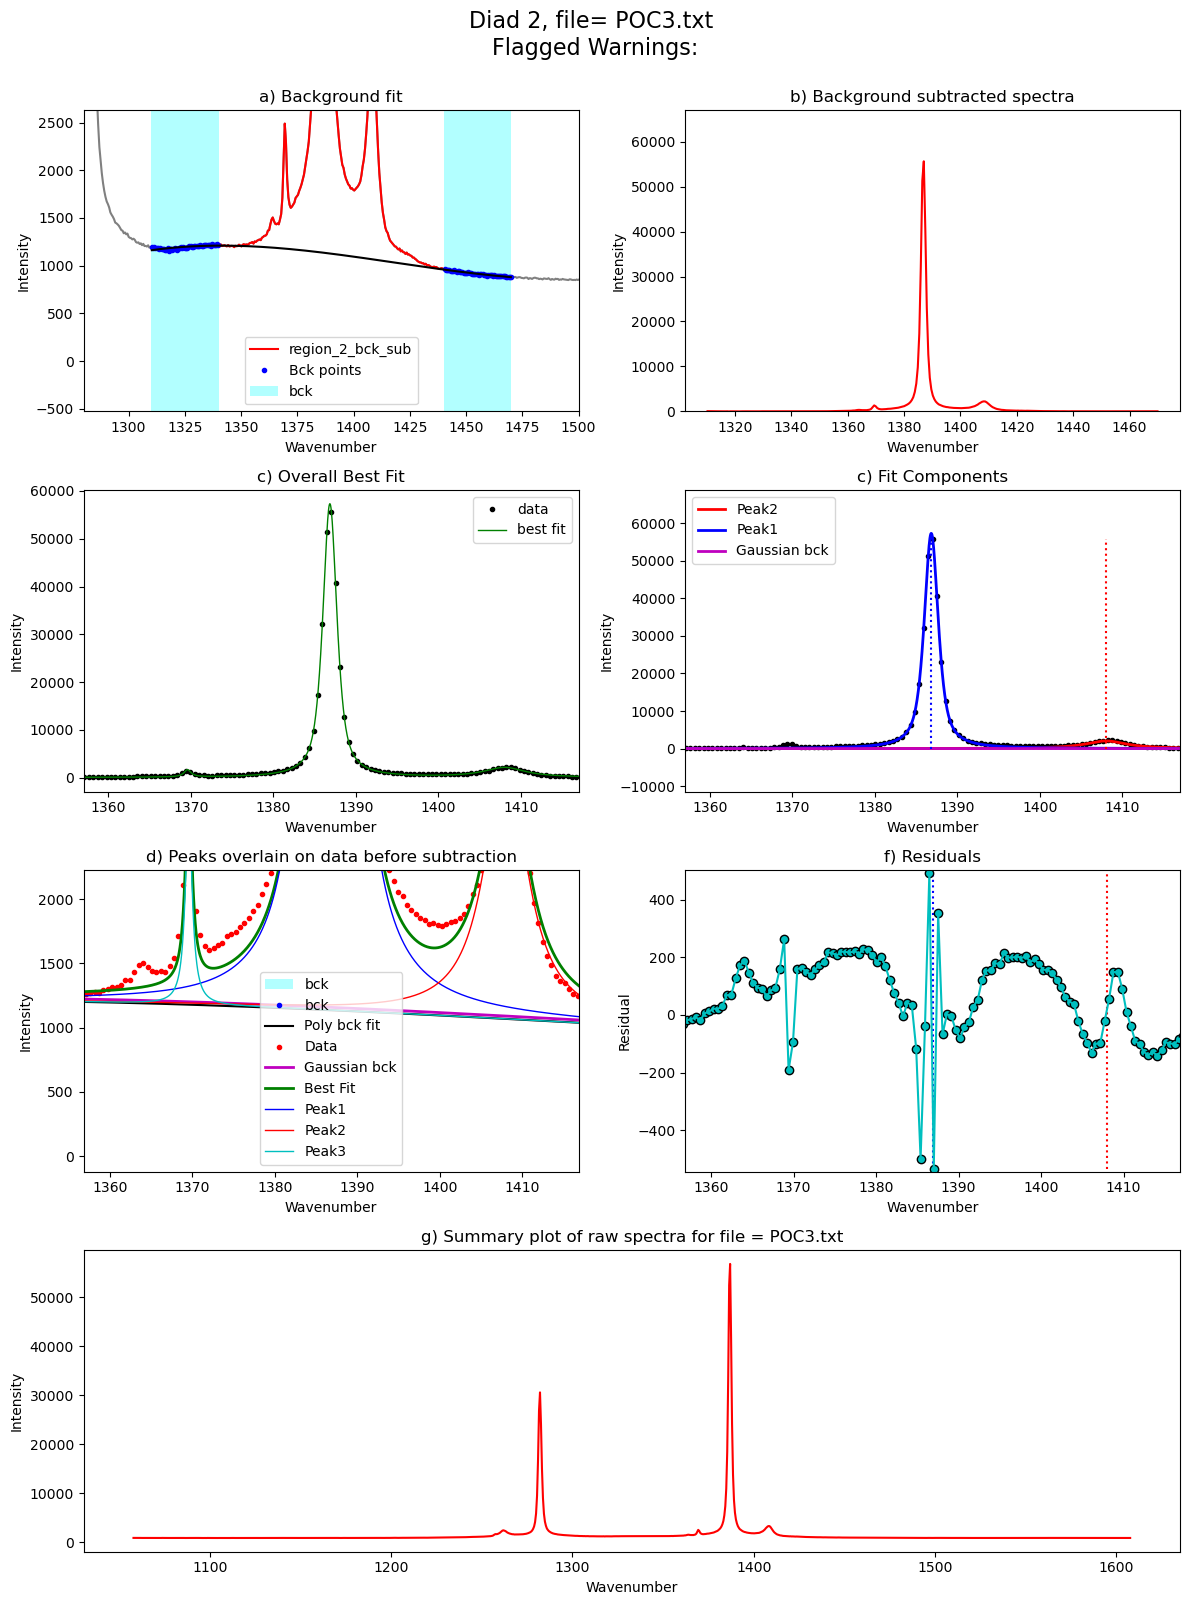

In [19]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename_Weak, filetype=filetype, close_figure=False)
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

In [20]:
# Update param with new sigma
diad2_fit_config=diad2_fit_config_init
diad2_fit_config.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
diad2_fit_config.sigma_allowance=2
diad2_fit_config.diad_amplitude=Diad2_fit['Diad2_Voigt_Area'][0]
diad2_fit_config.HB_amplitude=Diad2_fit['HB2_Area'][0]
diad2_fit_config

diad2_fit_config(model_name='PseudoVoigtModel', peak_pos_gauss=1385, gauss_sigma=20, gauss_amp=3000, diad_sigma=1.0214700422006997, C13_sigma=0.1, sigma_allowance=2, N_poly_bck_diad2=3, lower_bck_diad2=(1310, 1340), upper_bck_diad2=(1440, 1470), diad_amplitude=167097.25115637315, HB_amplitude=19693.225870325674, x_range_baseline=30, y_range_baseline=1000, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

## You can also try looping if all your spectra are pretty similar

 38%|███████████████████████████████▌                                                    | 3/8 [00:24<00:32,  6.51s/it]

refit attempt 1
Flagged Warnings: G_HighAmp
refit attempt  =2, Flagged Warnings: G_HighAmp
Flagged Warnings: G_HighAmp
refit attempt  =3, Flagged Warnings: G_HighAmp
Flagged Warnings: G_HighAmp
refit attempt  =4, Flagged Warnings: G_HighAmp
Flagged Warnings: G_HighAmp
refit attempt  =5, Flagged Warnings: G_HighAmp
Flagged Warnings: G_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:15<00:00, 16.98s/it]


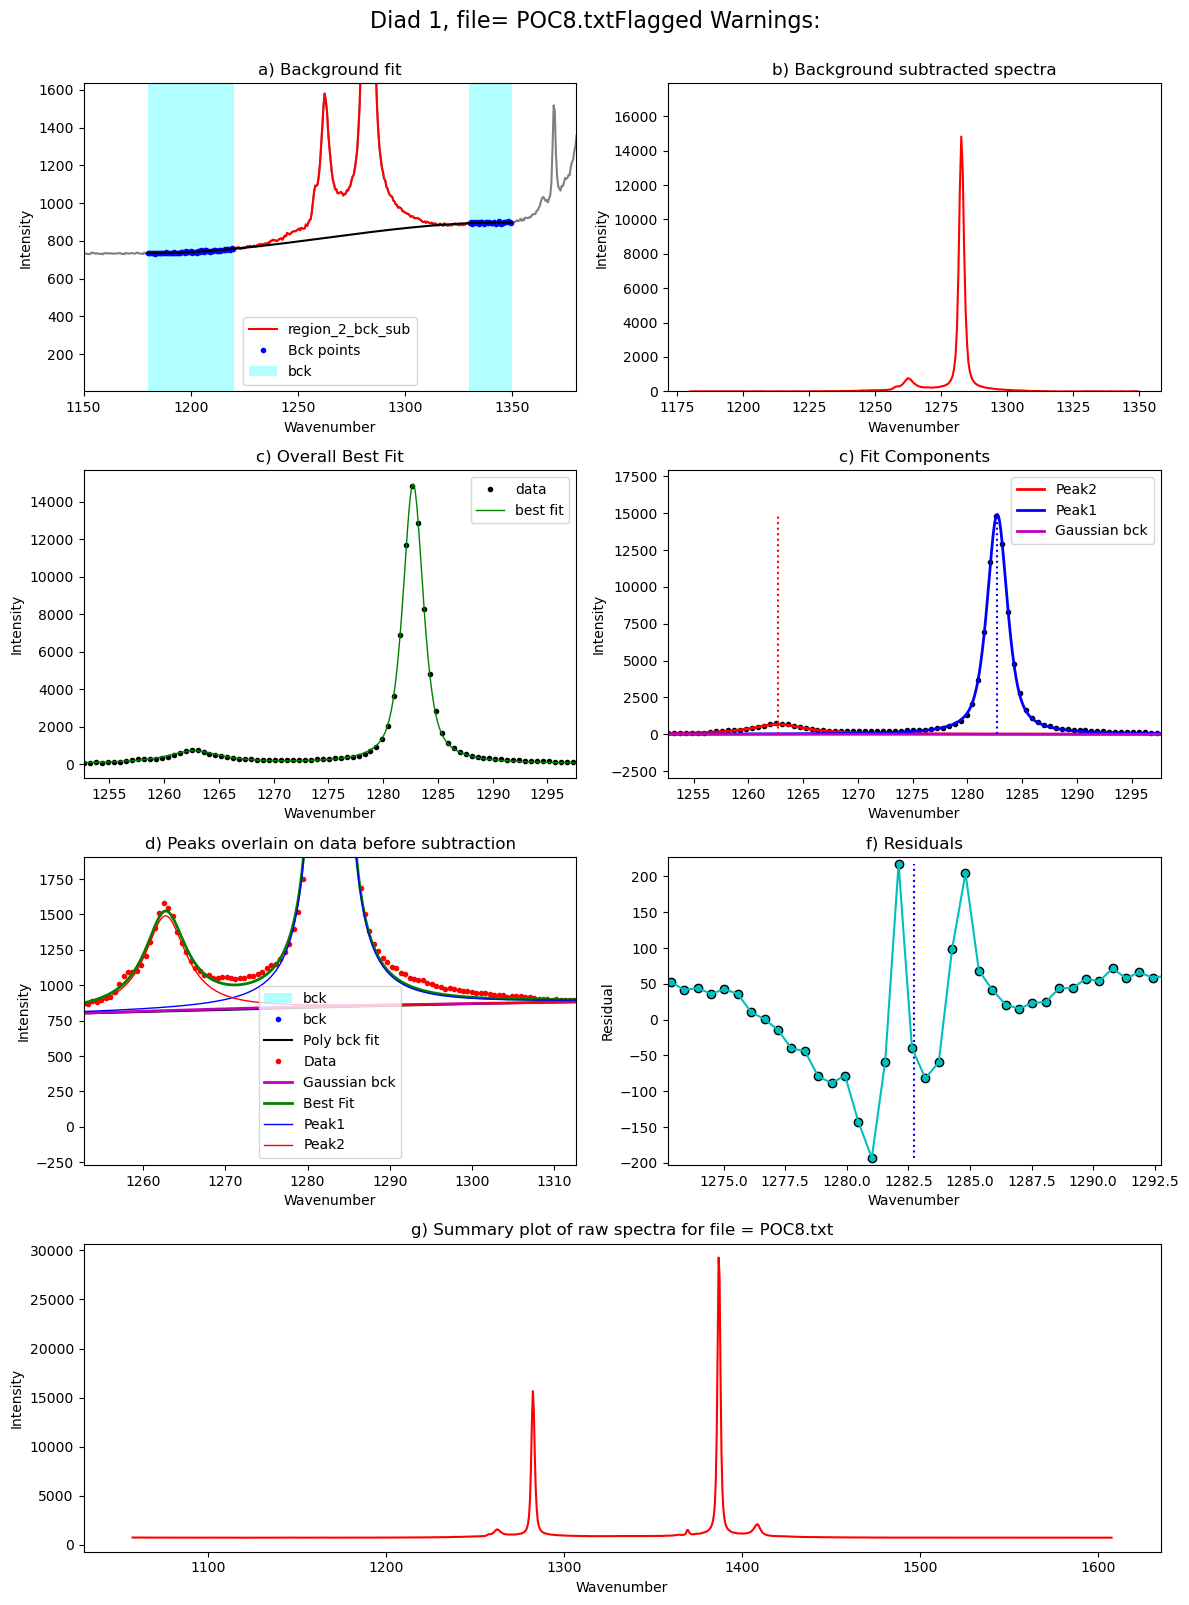

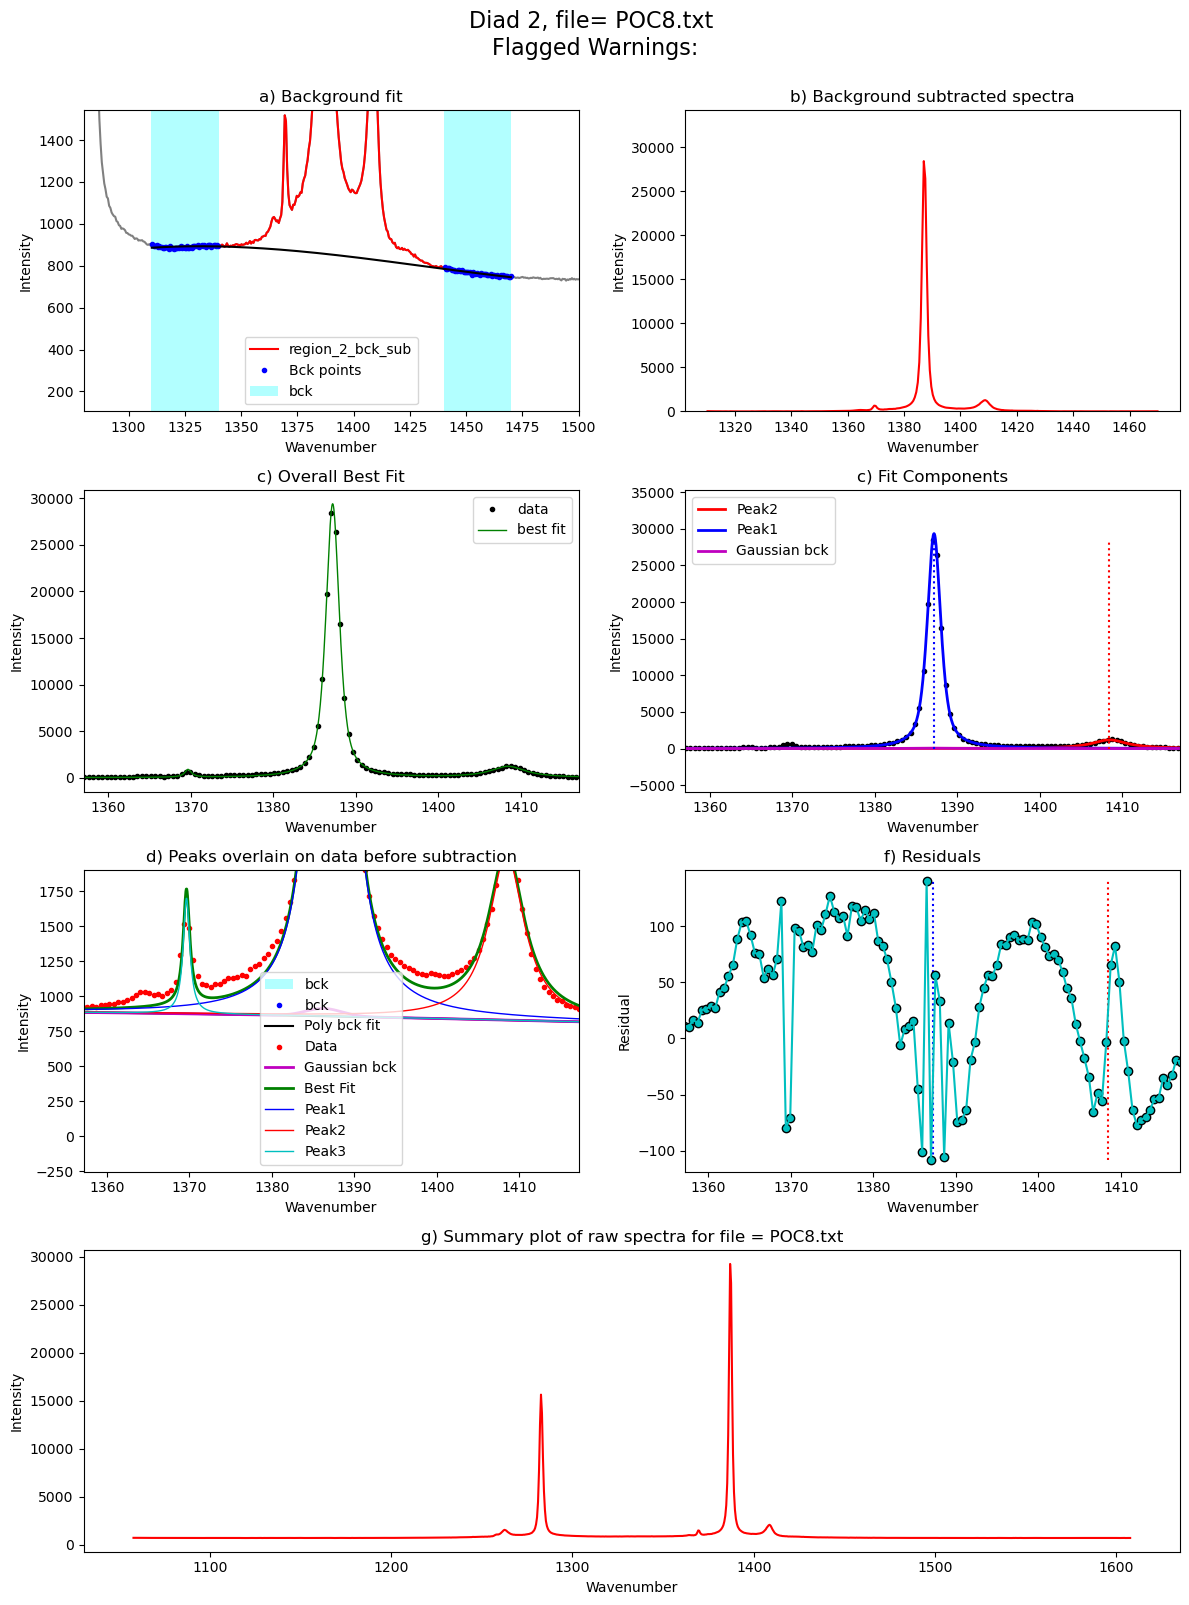

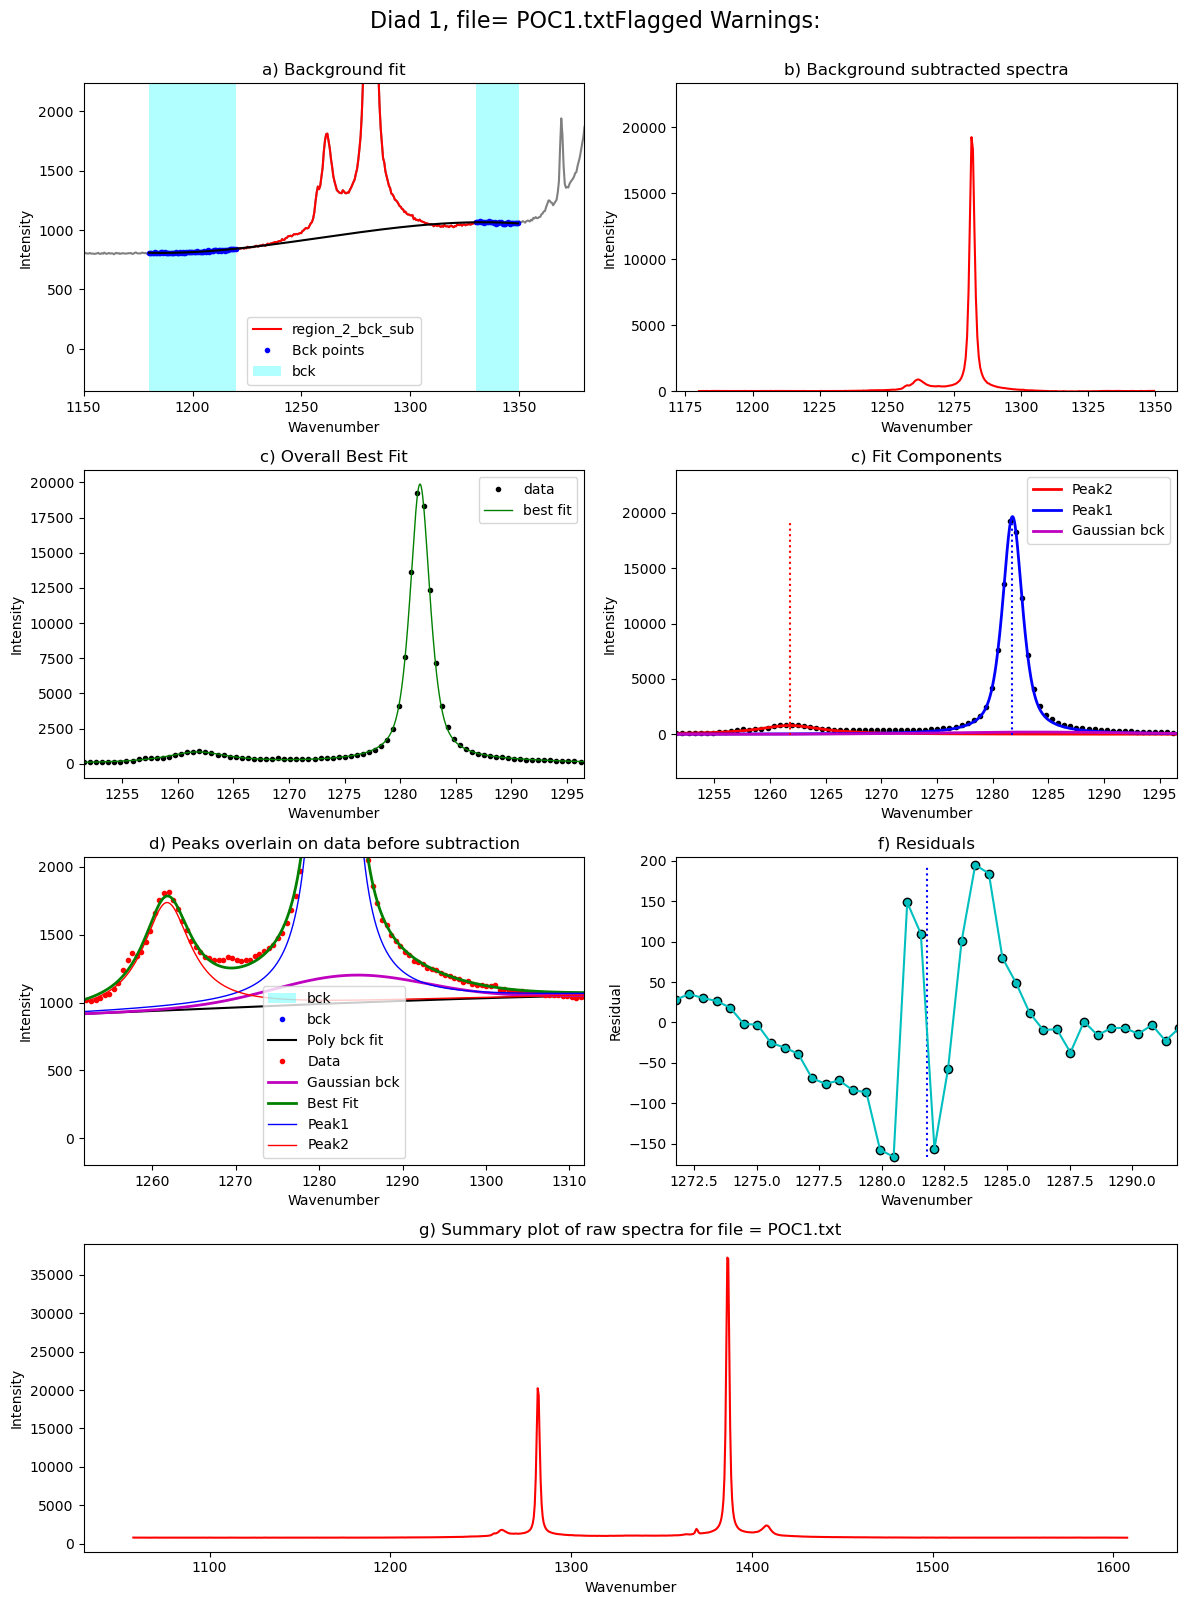

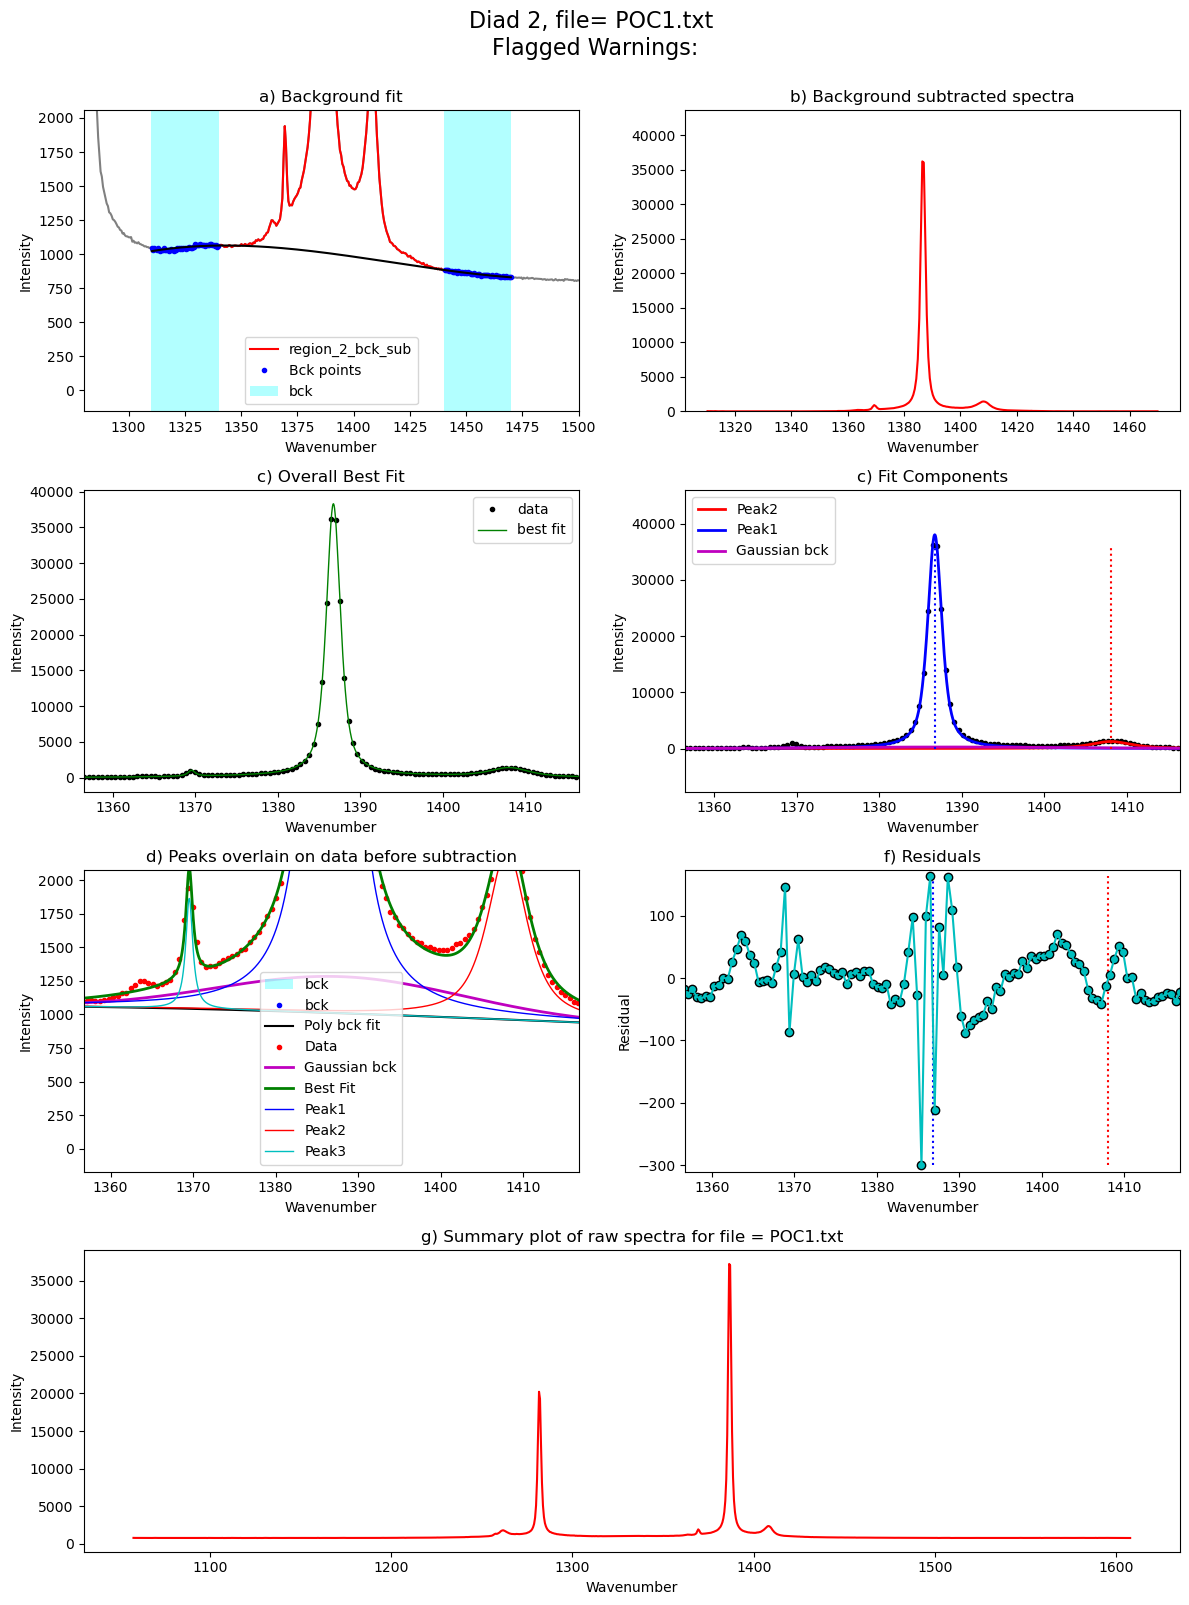

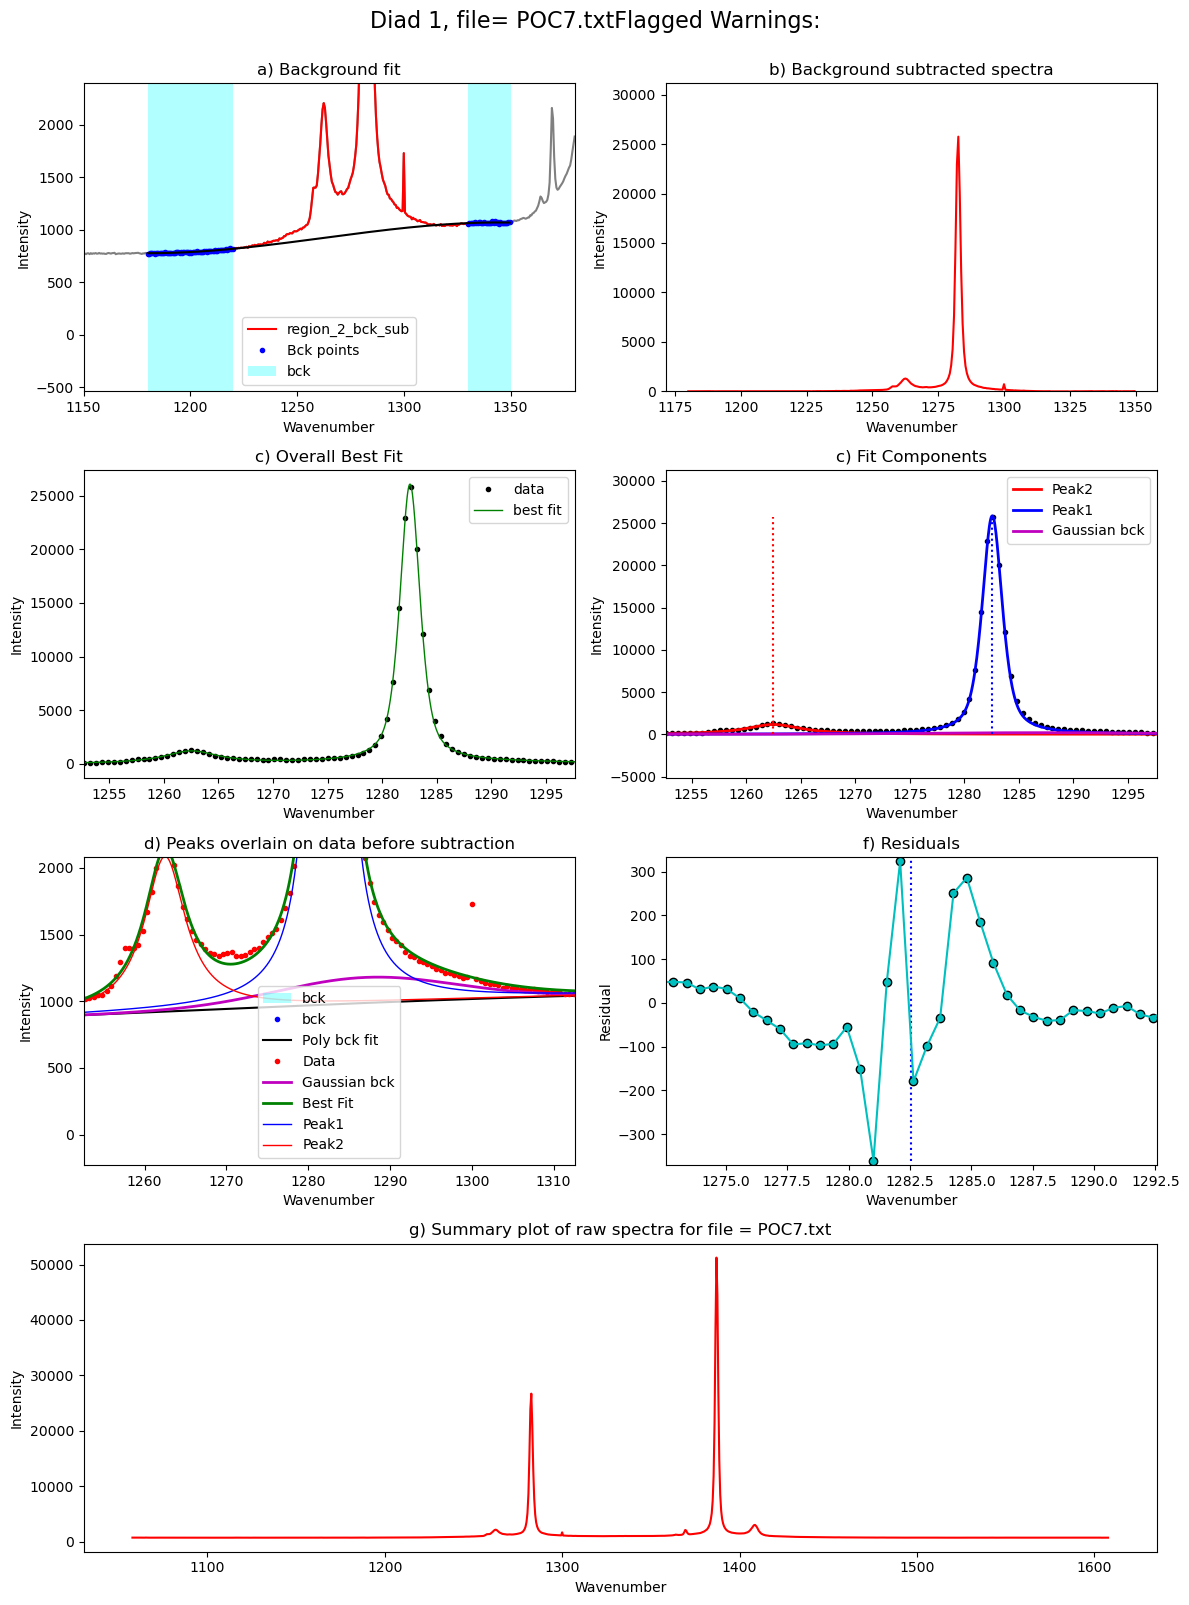

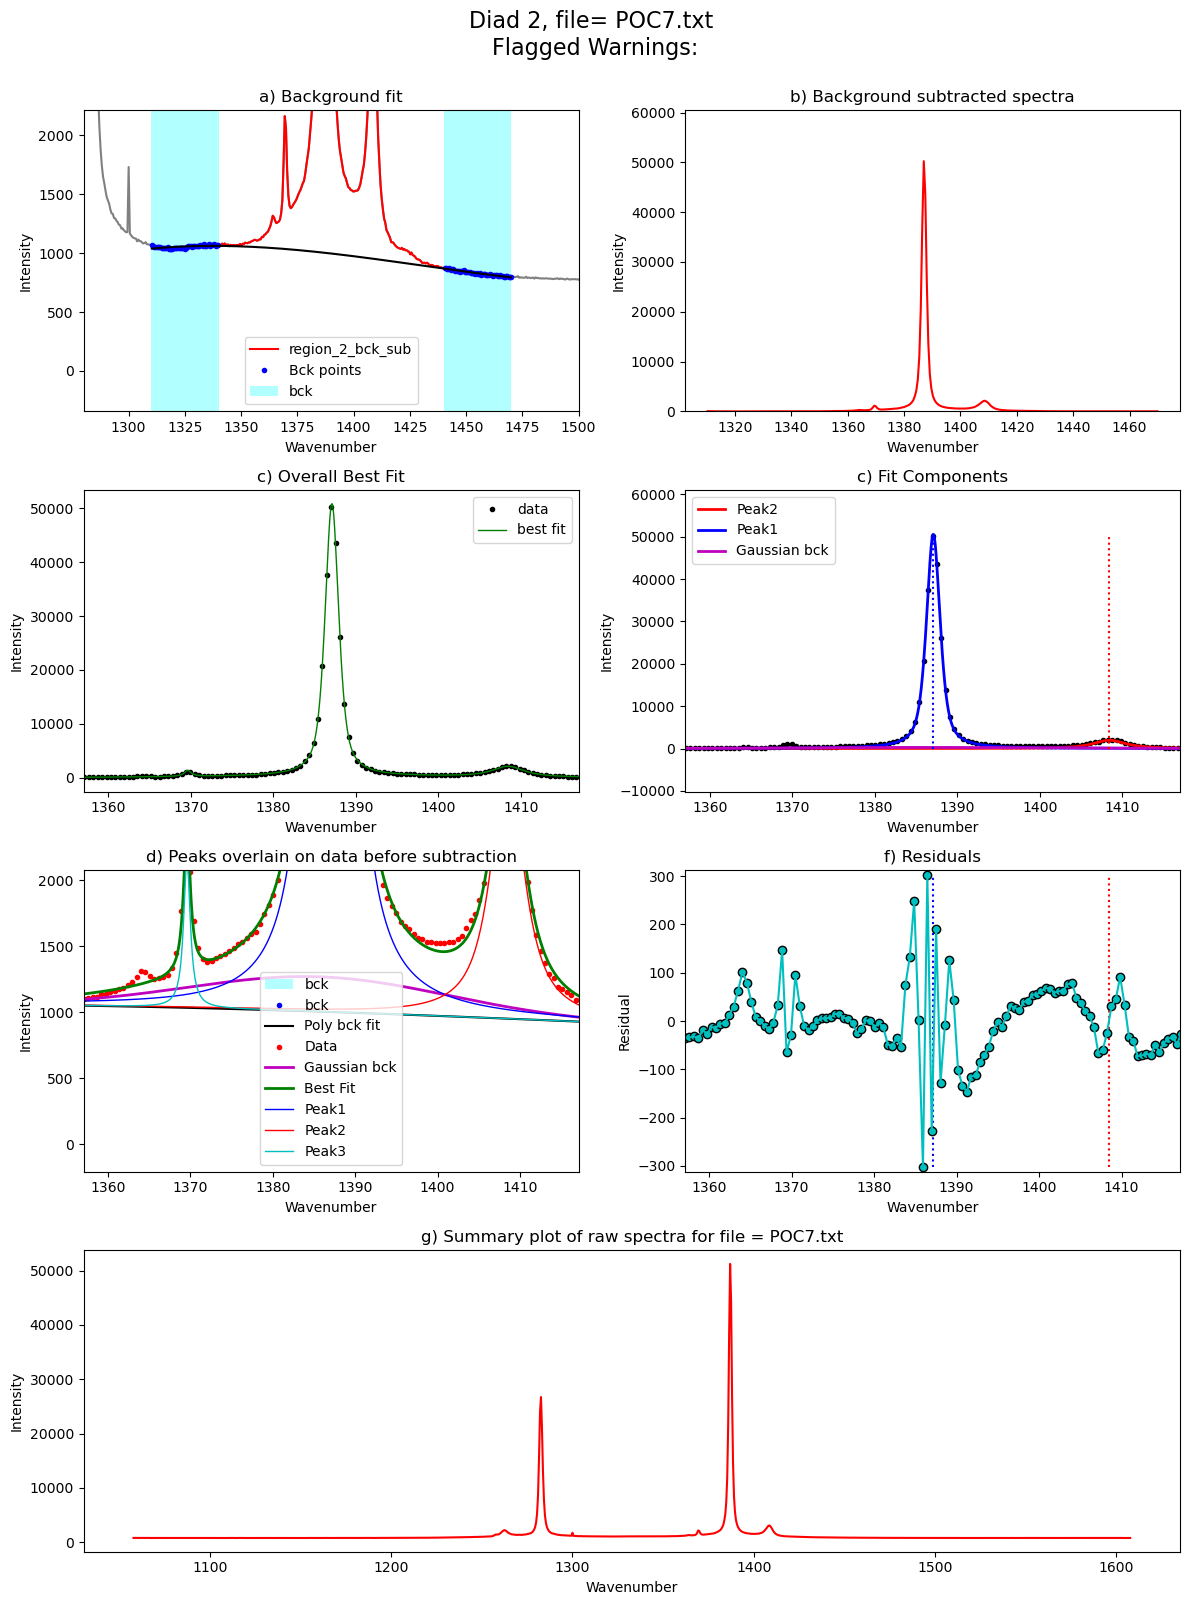

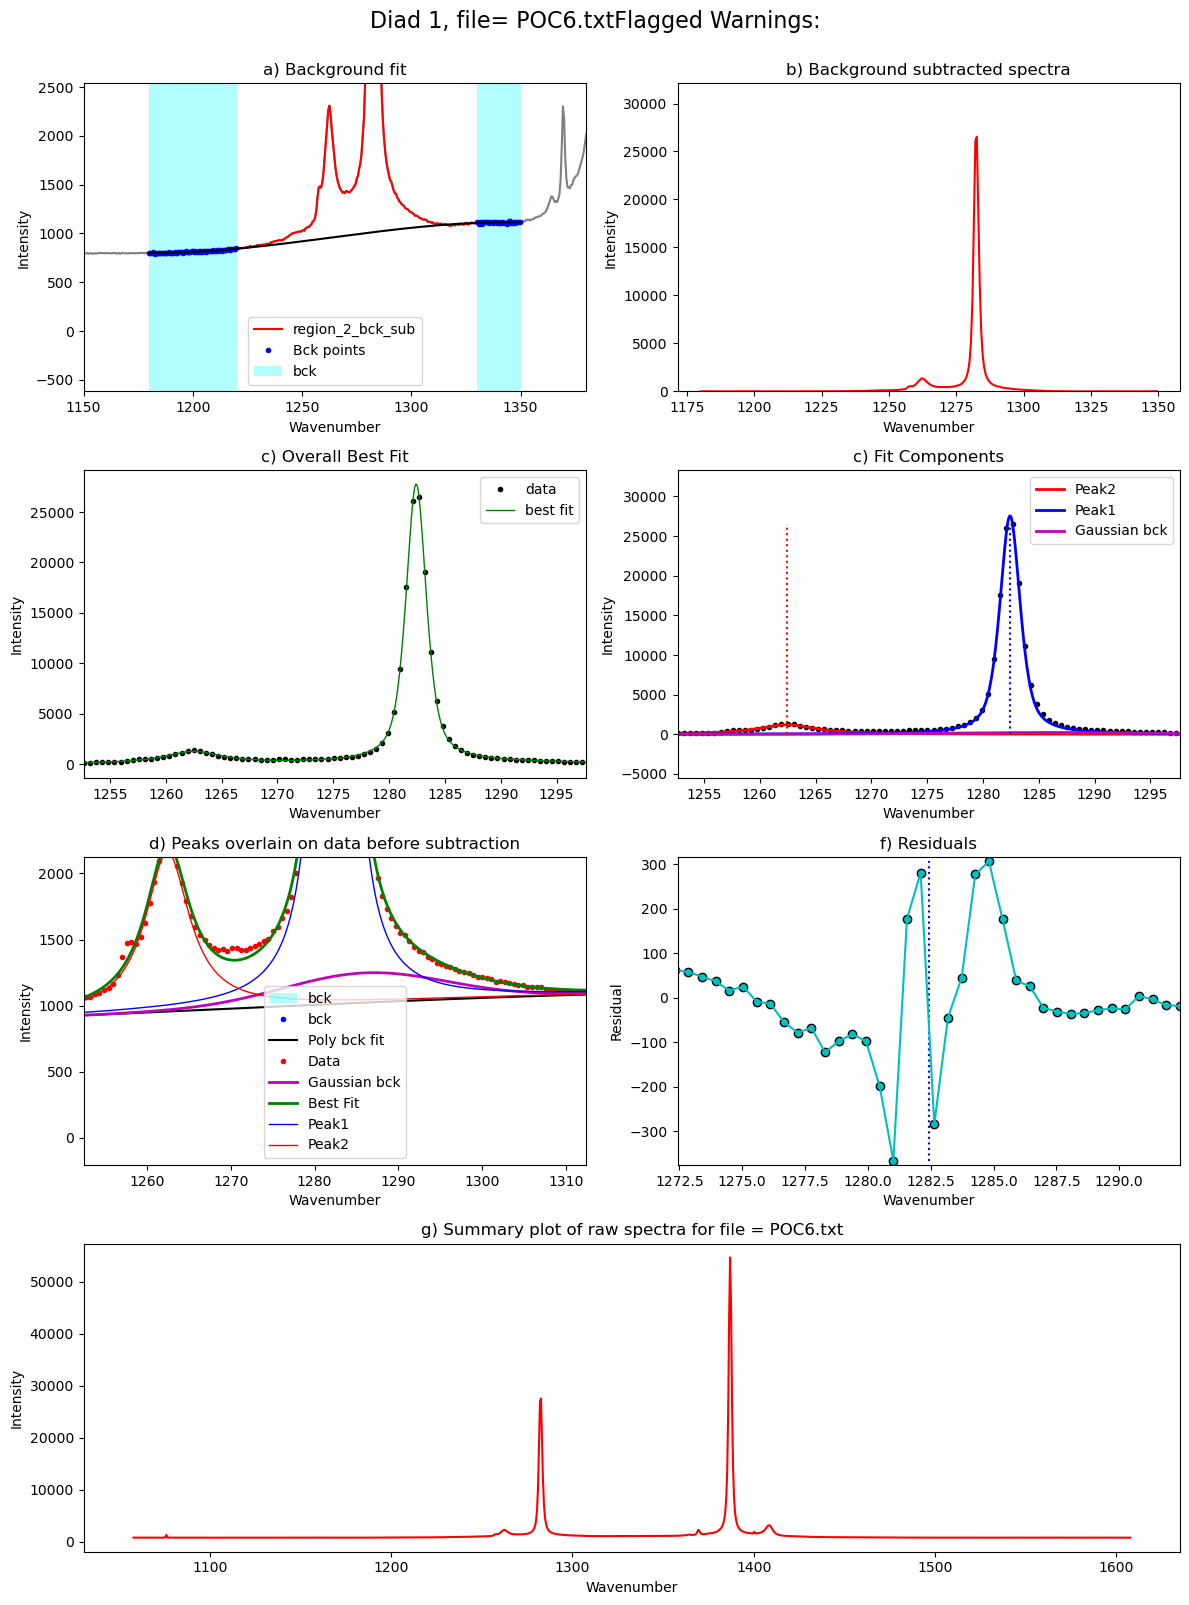

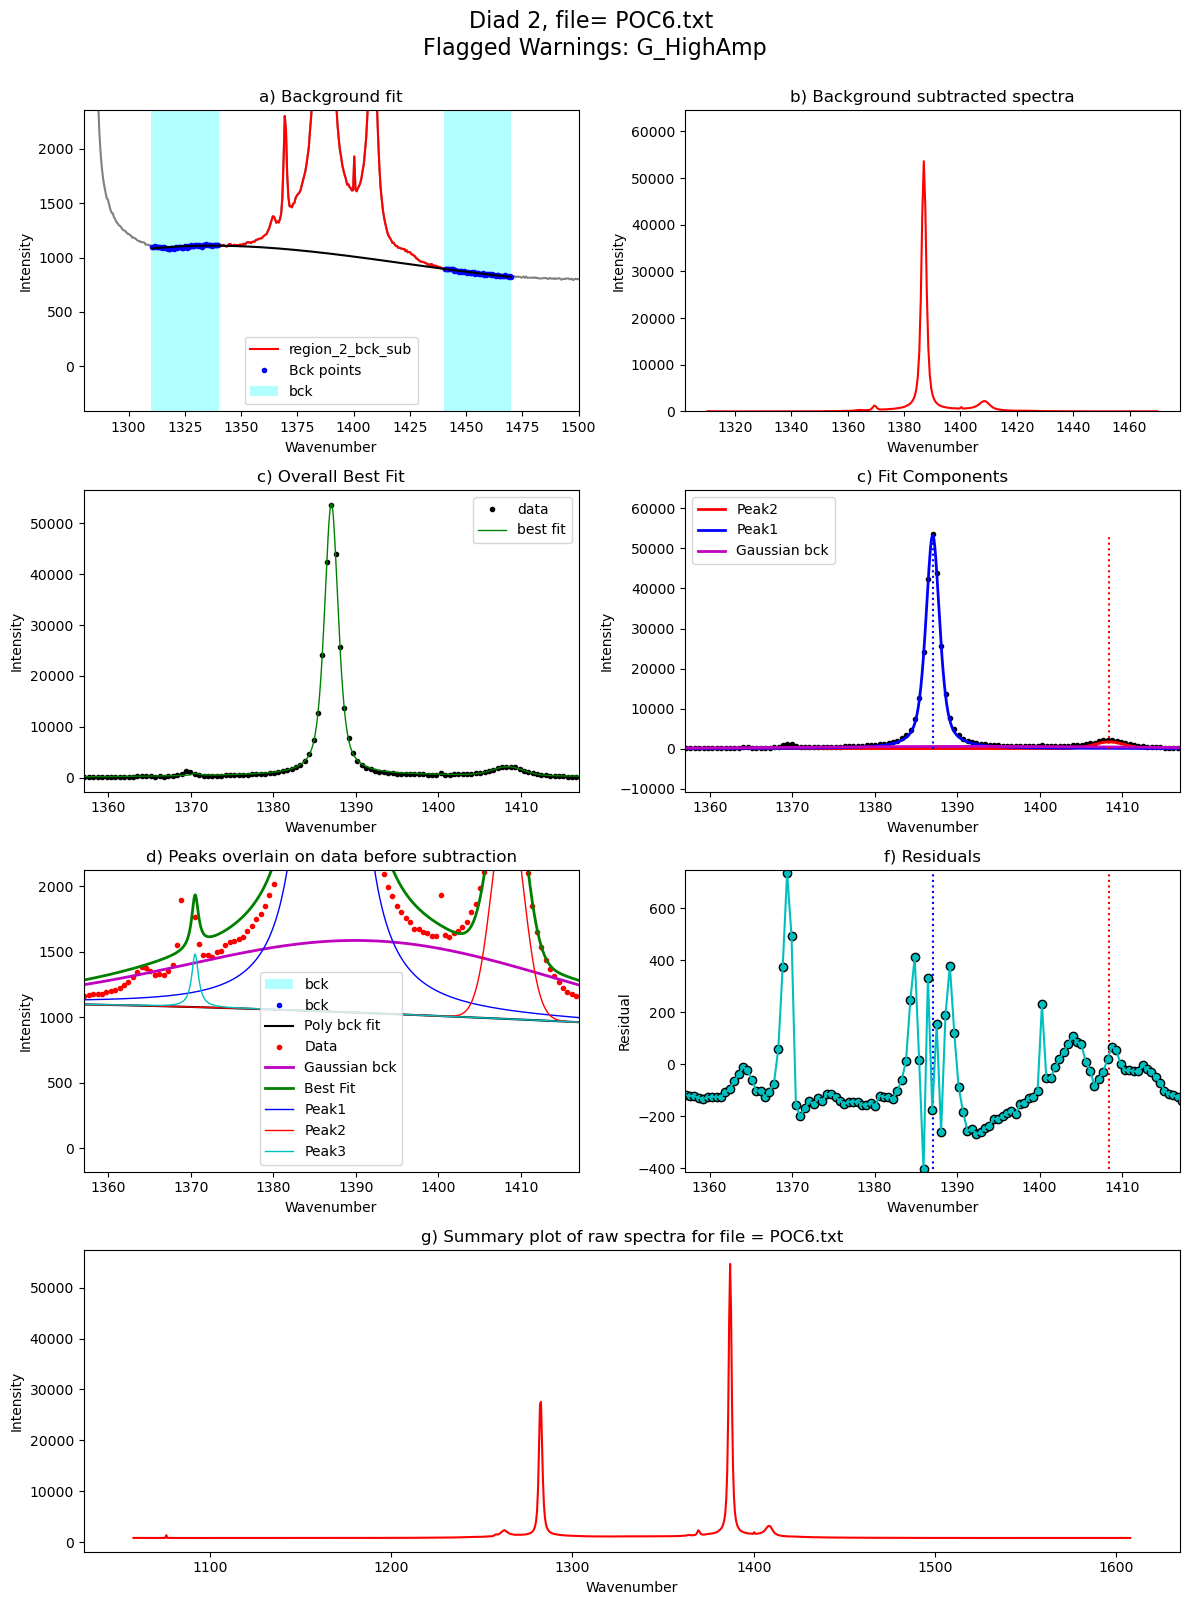

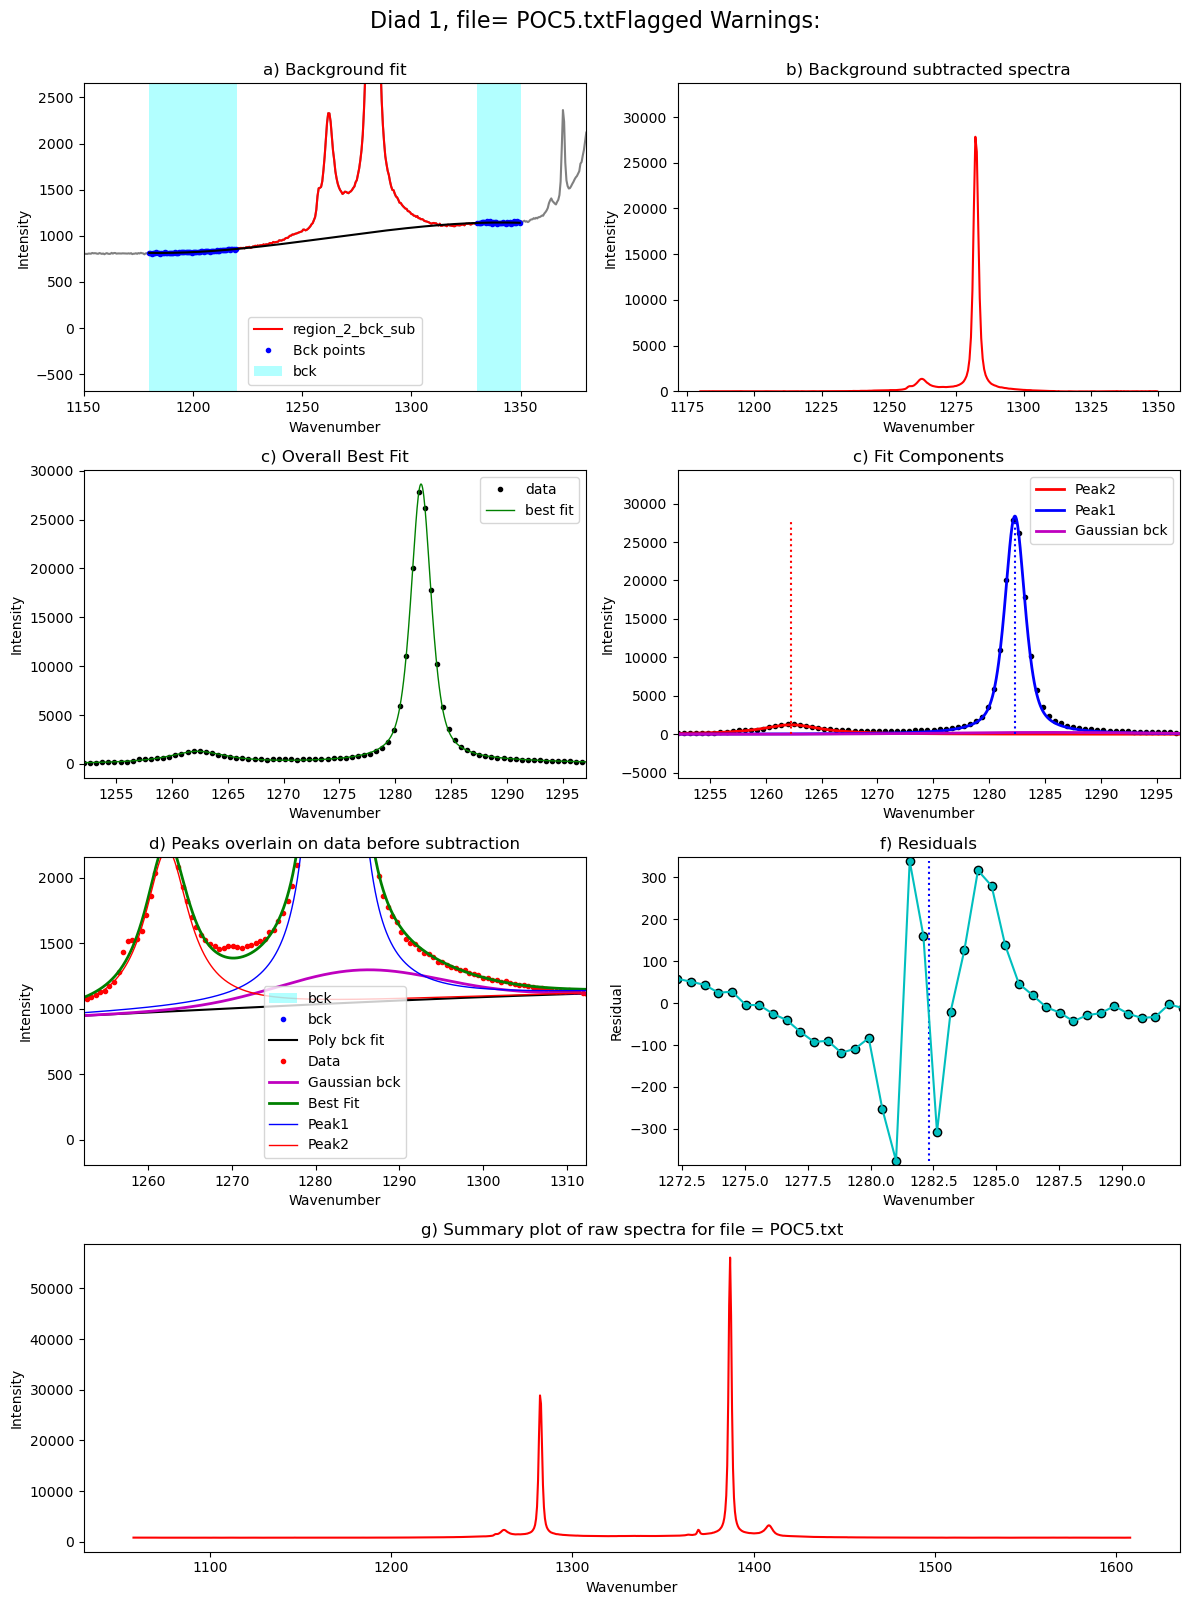

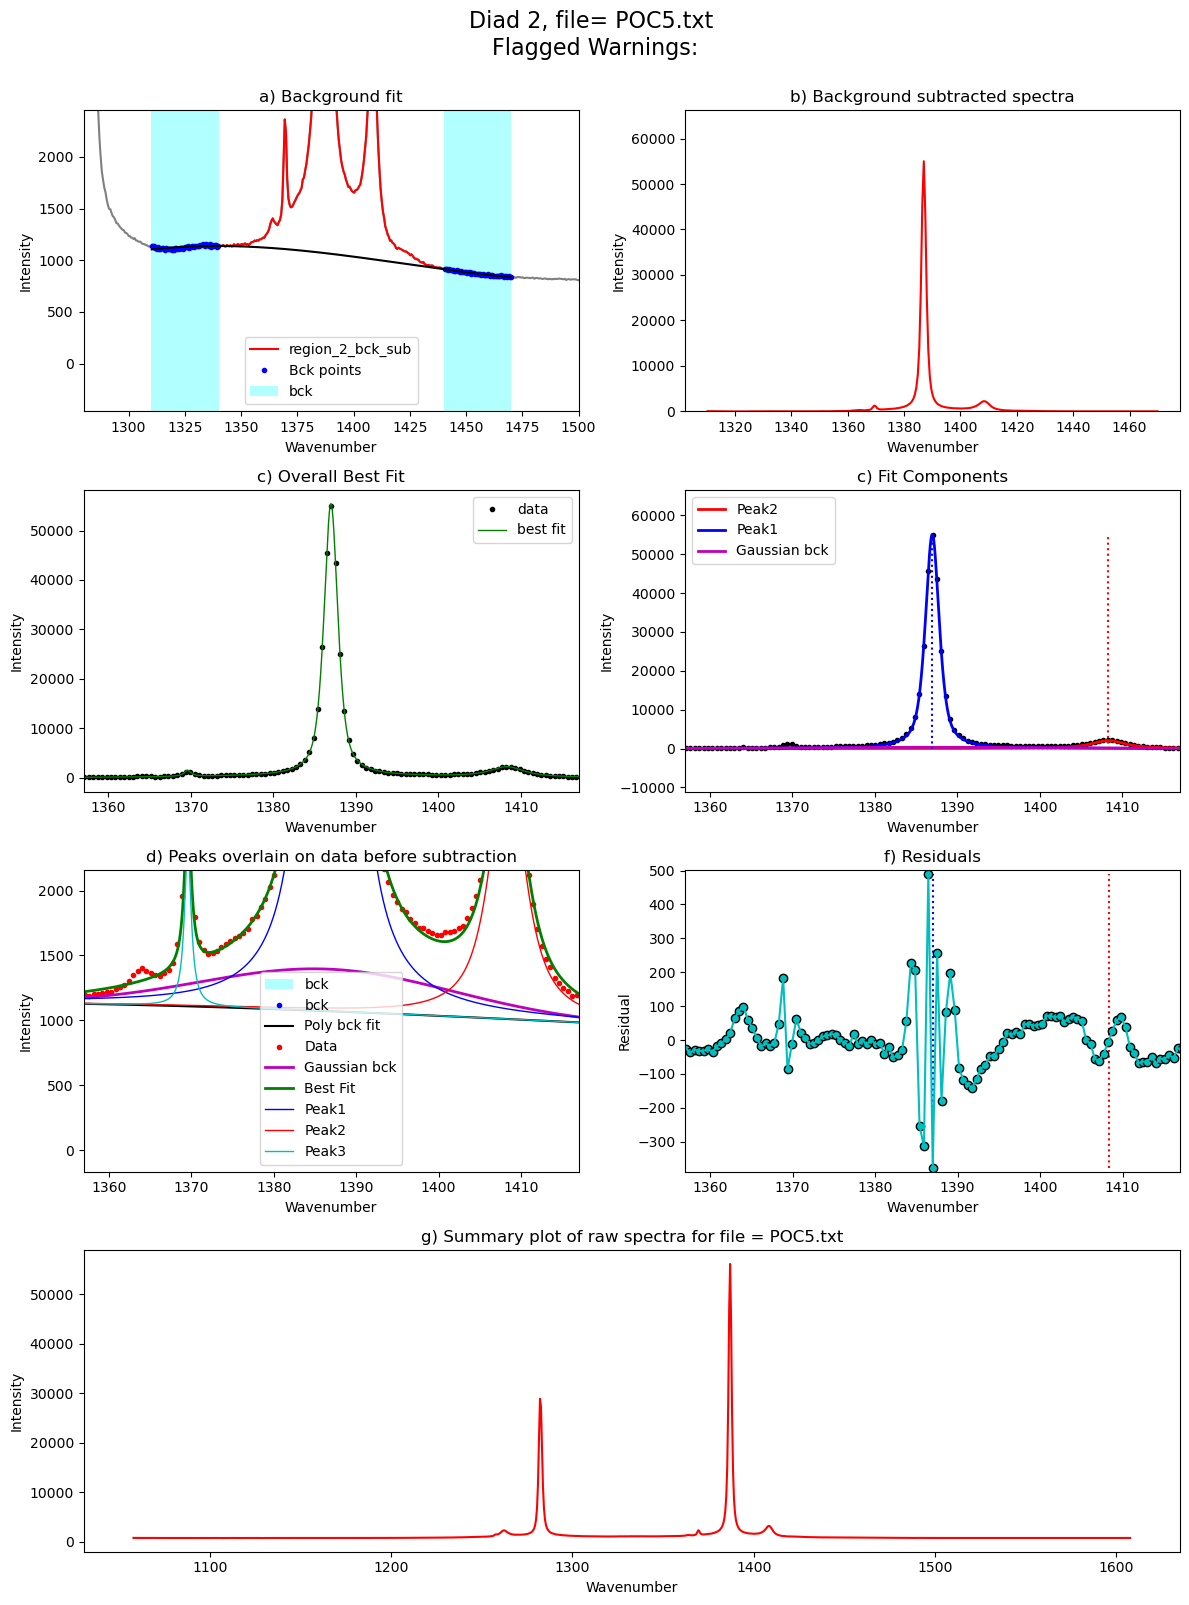

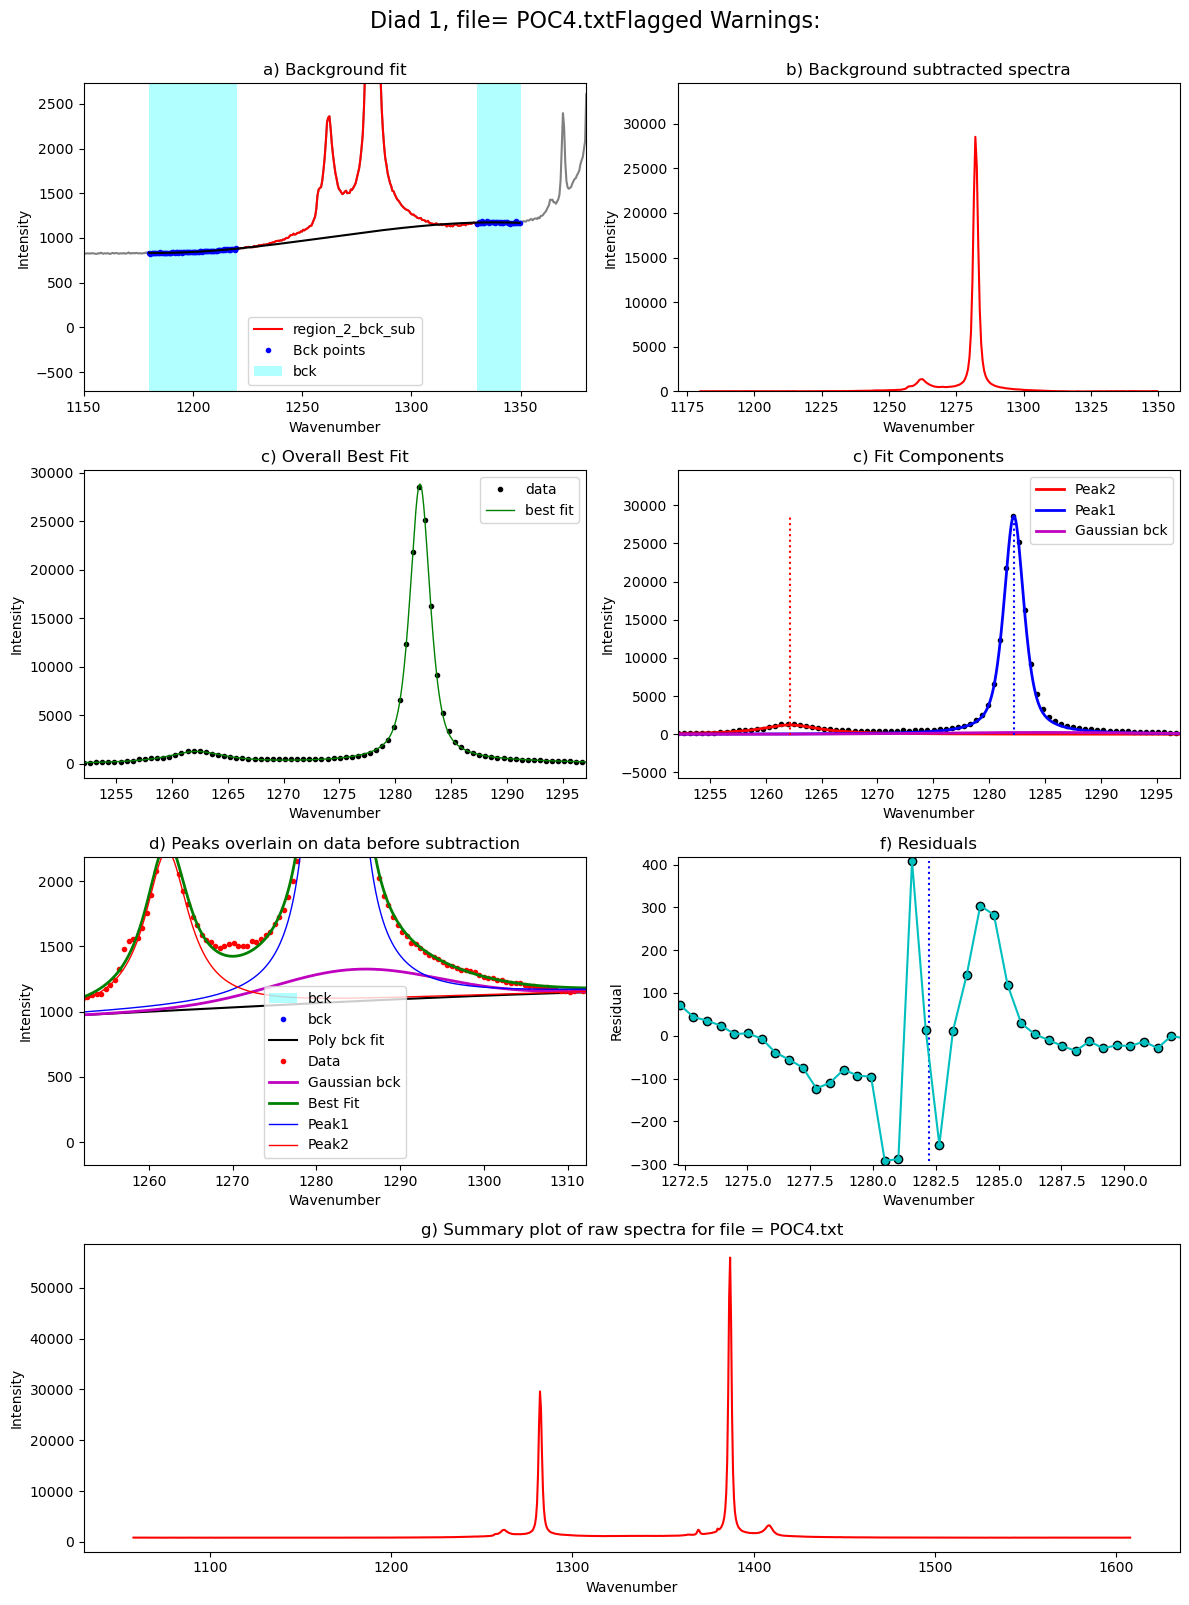

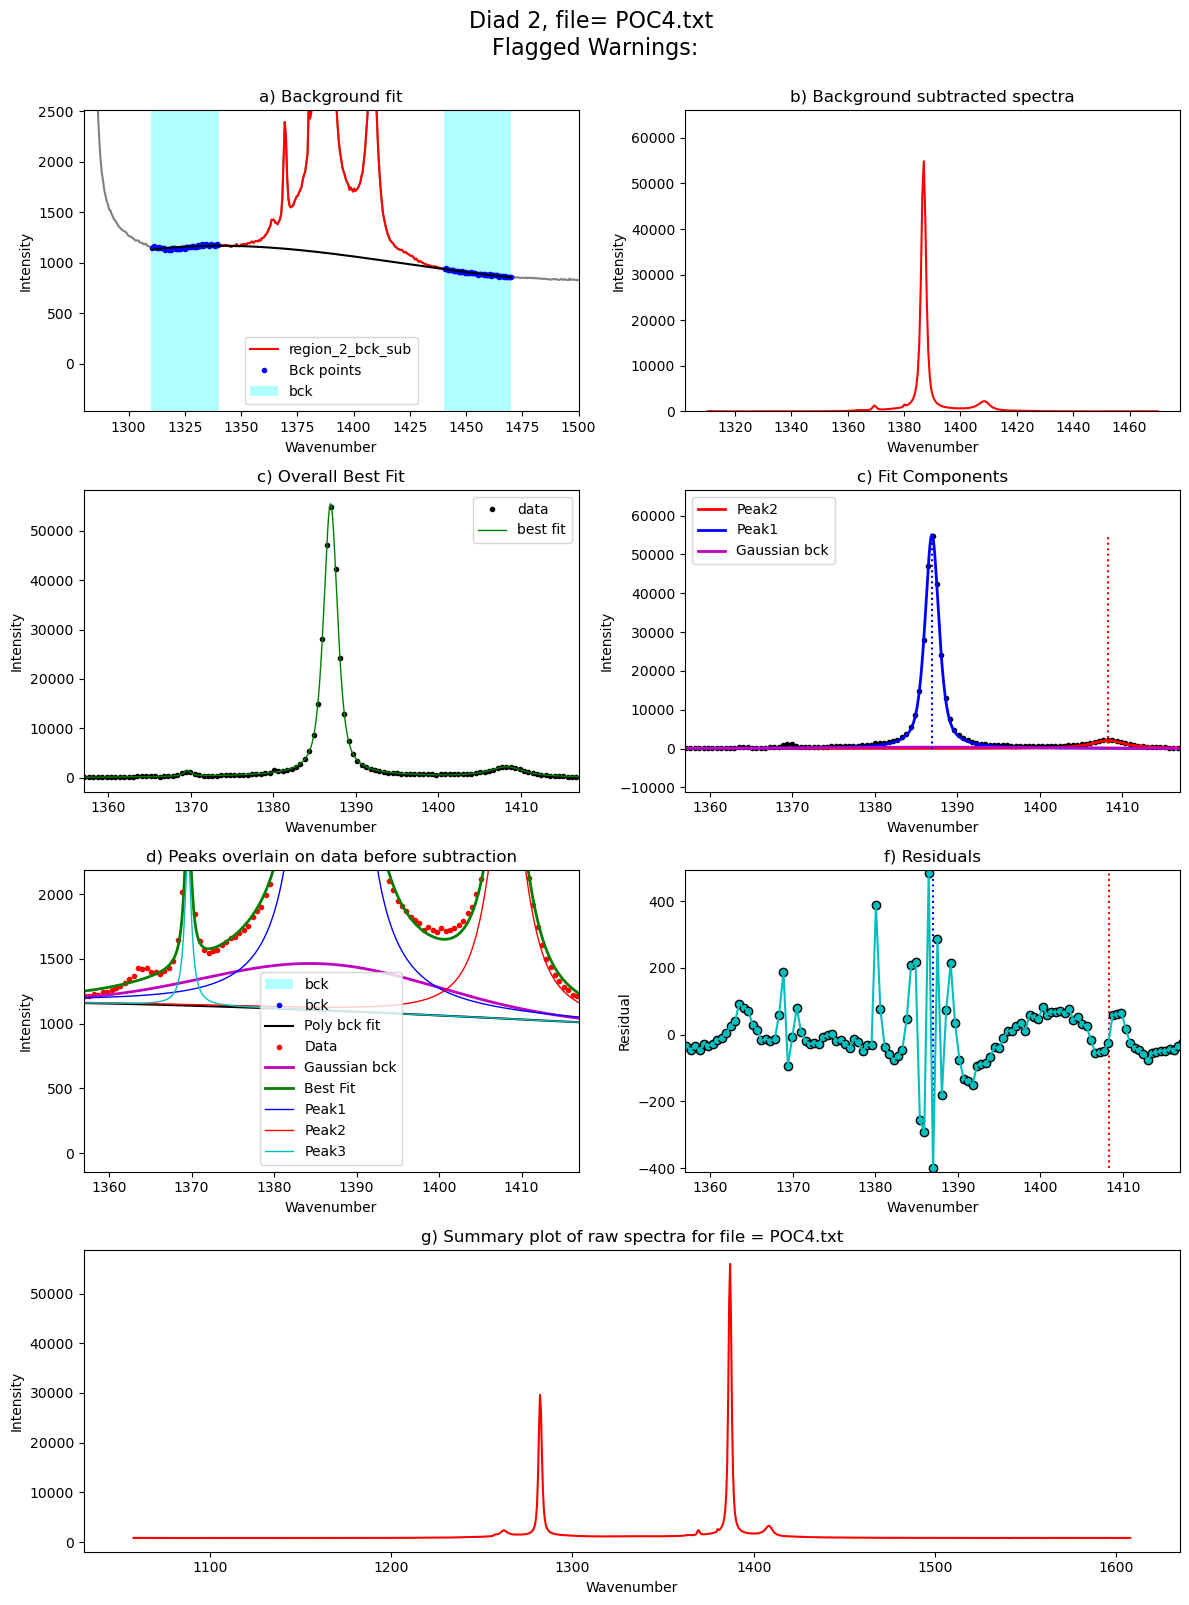

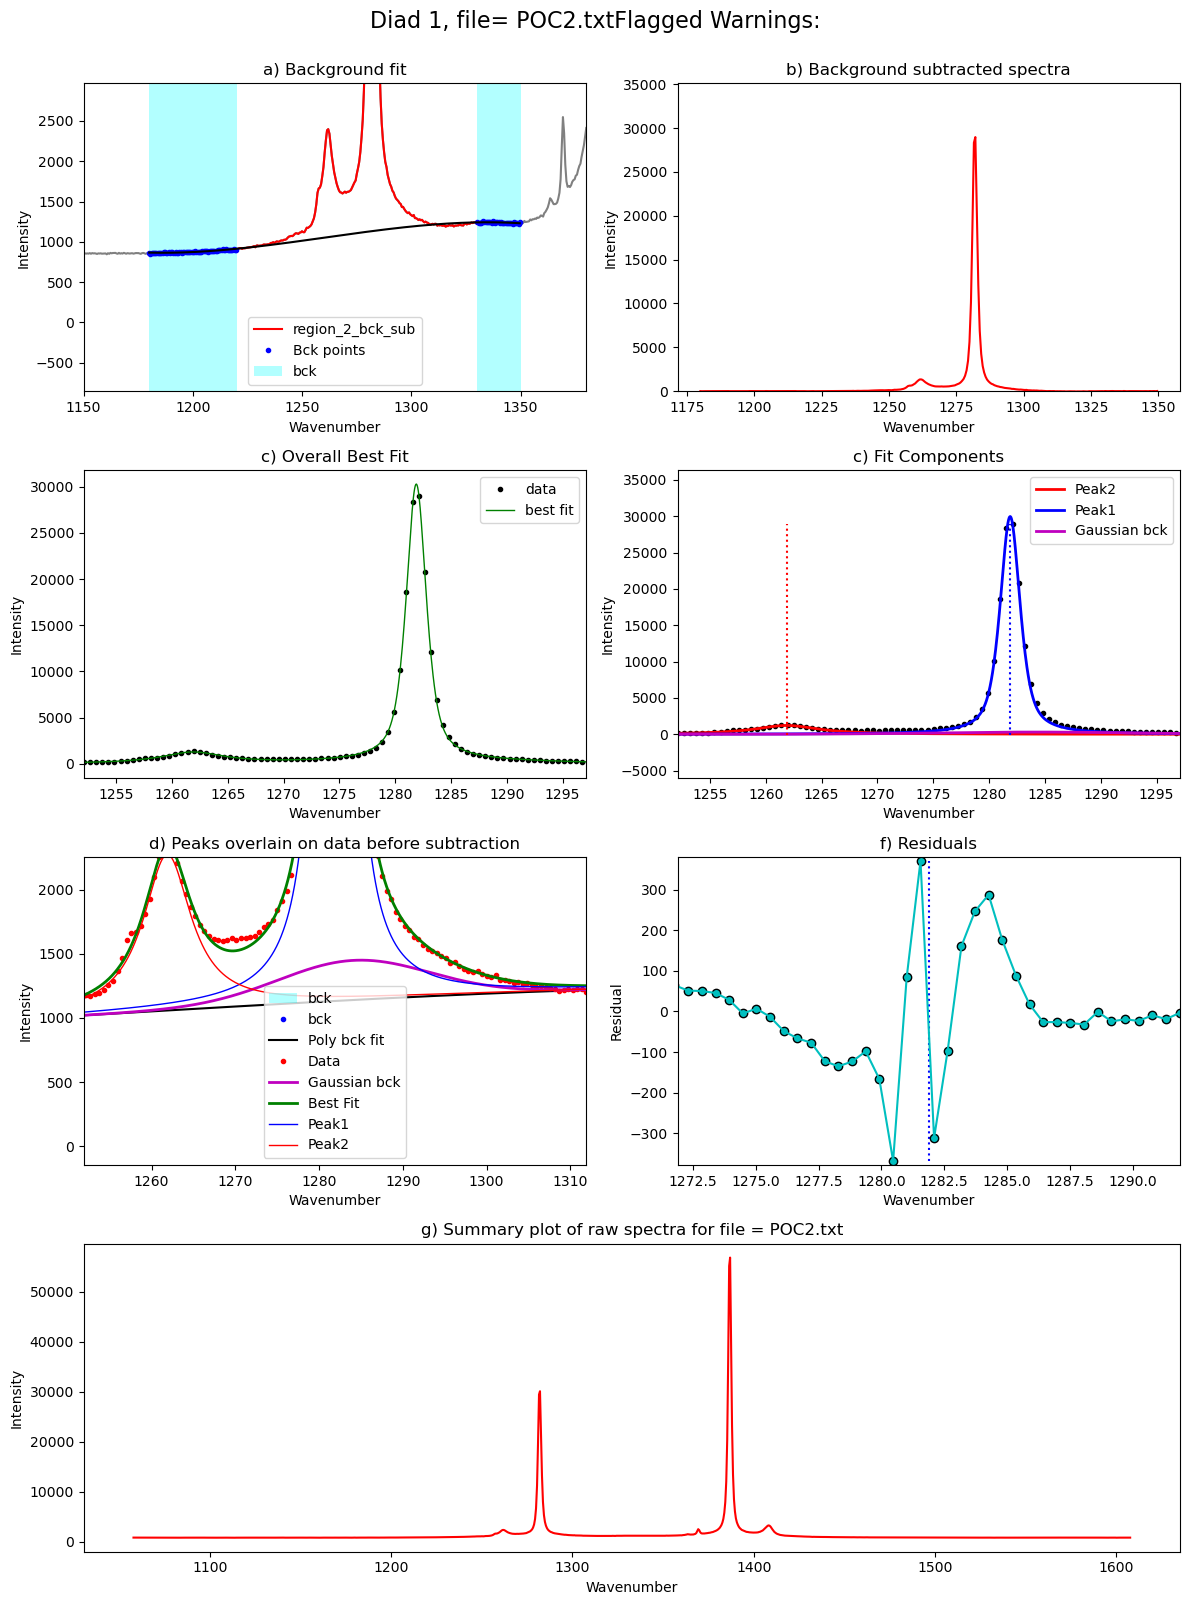

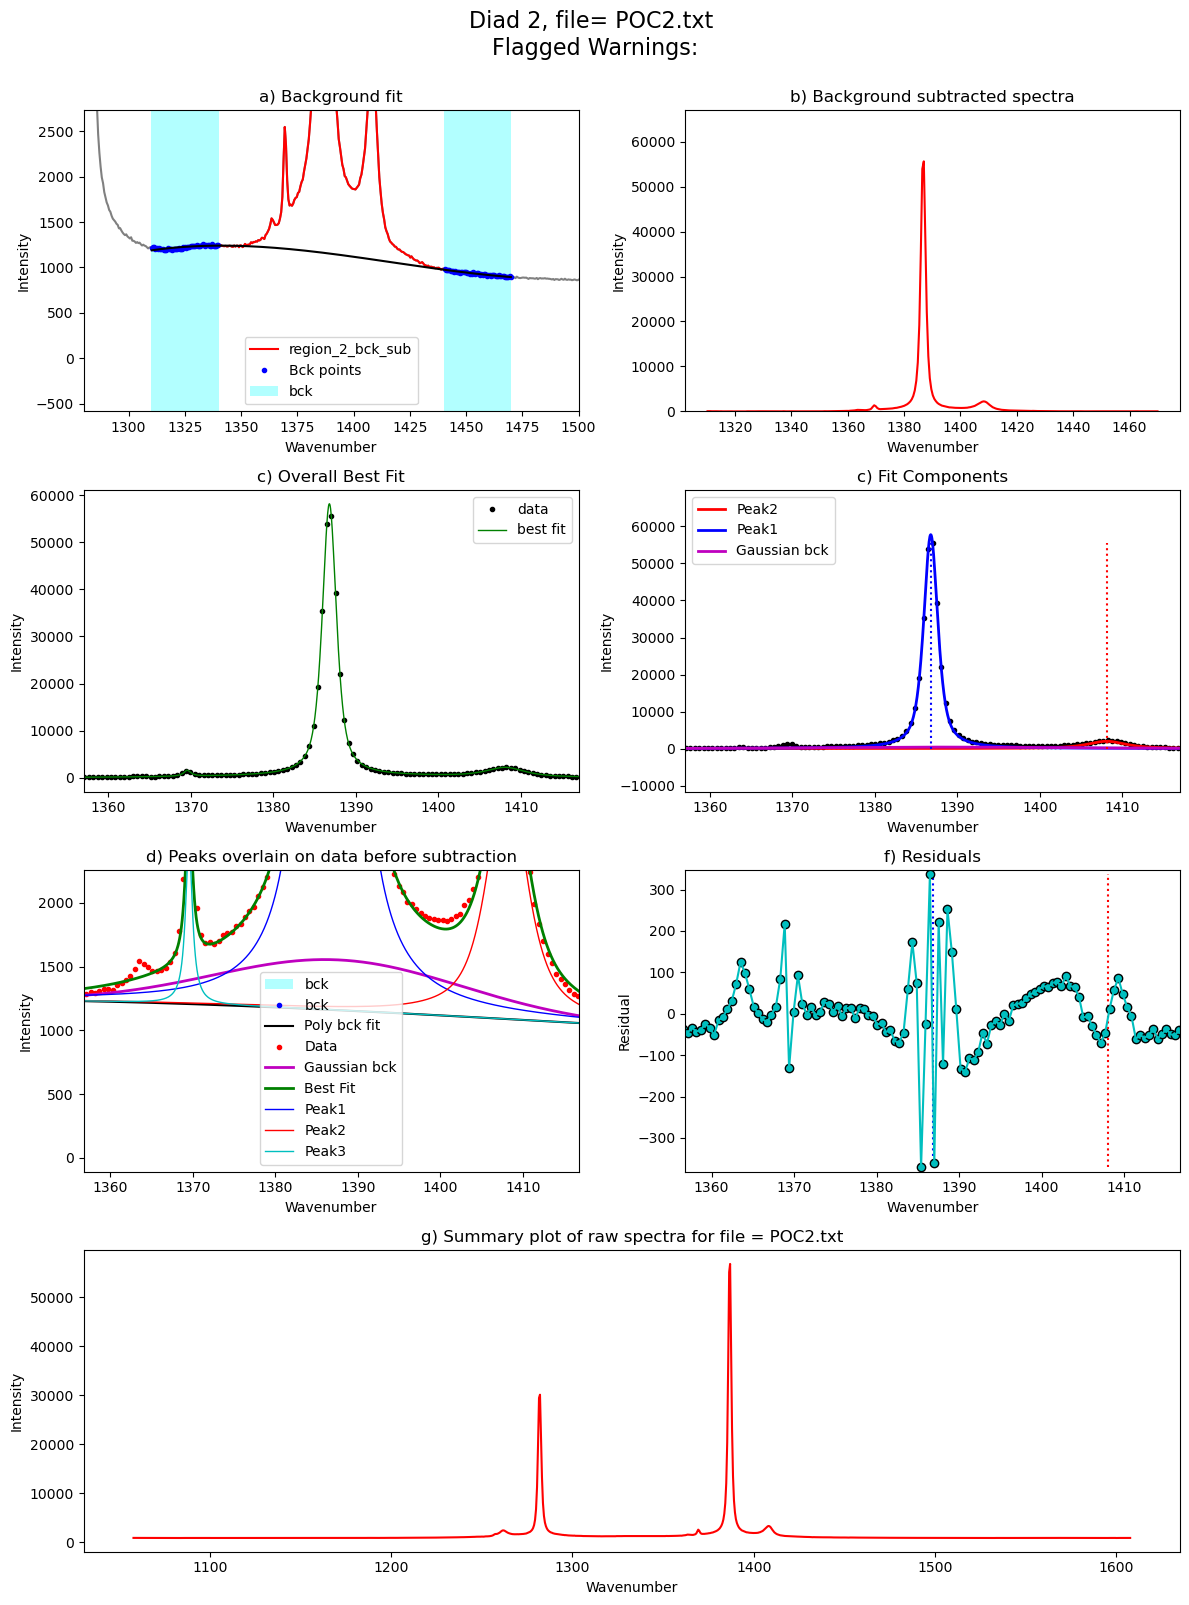

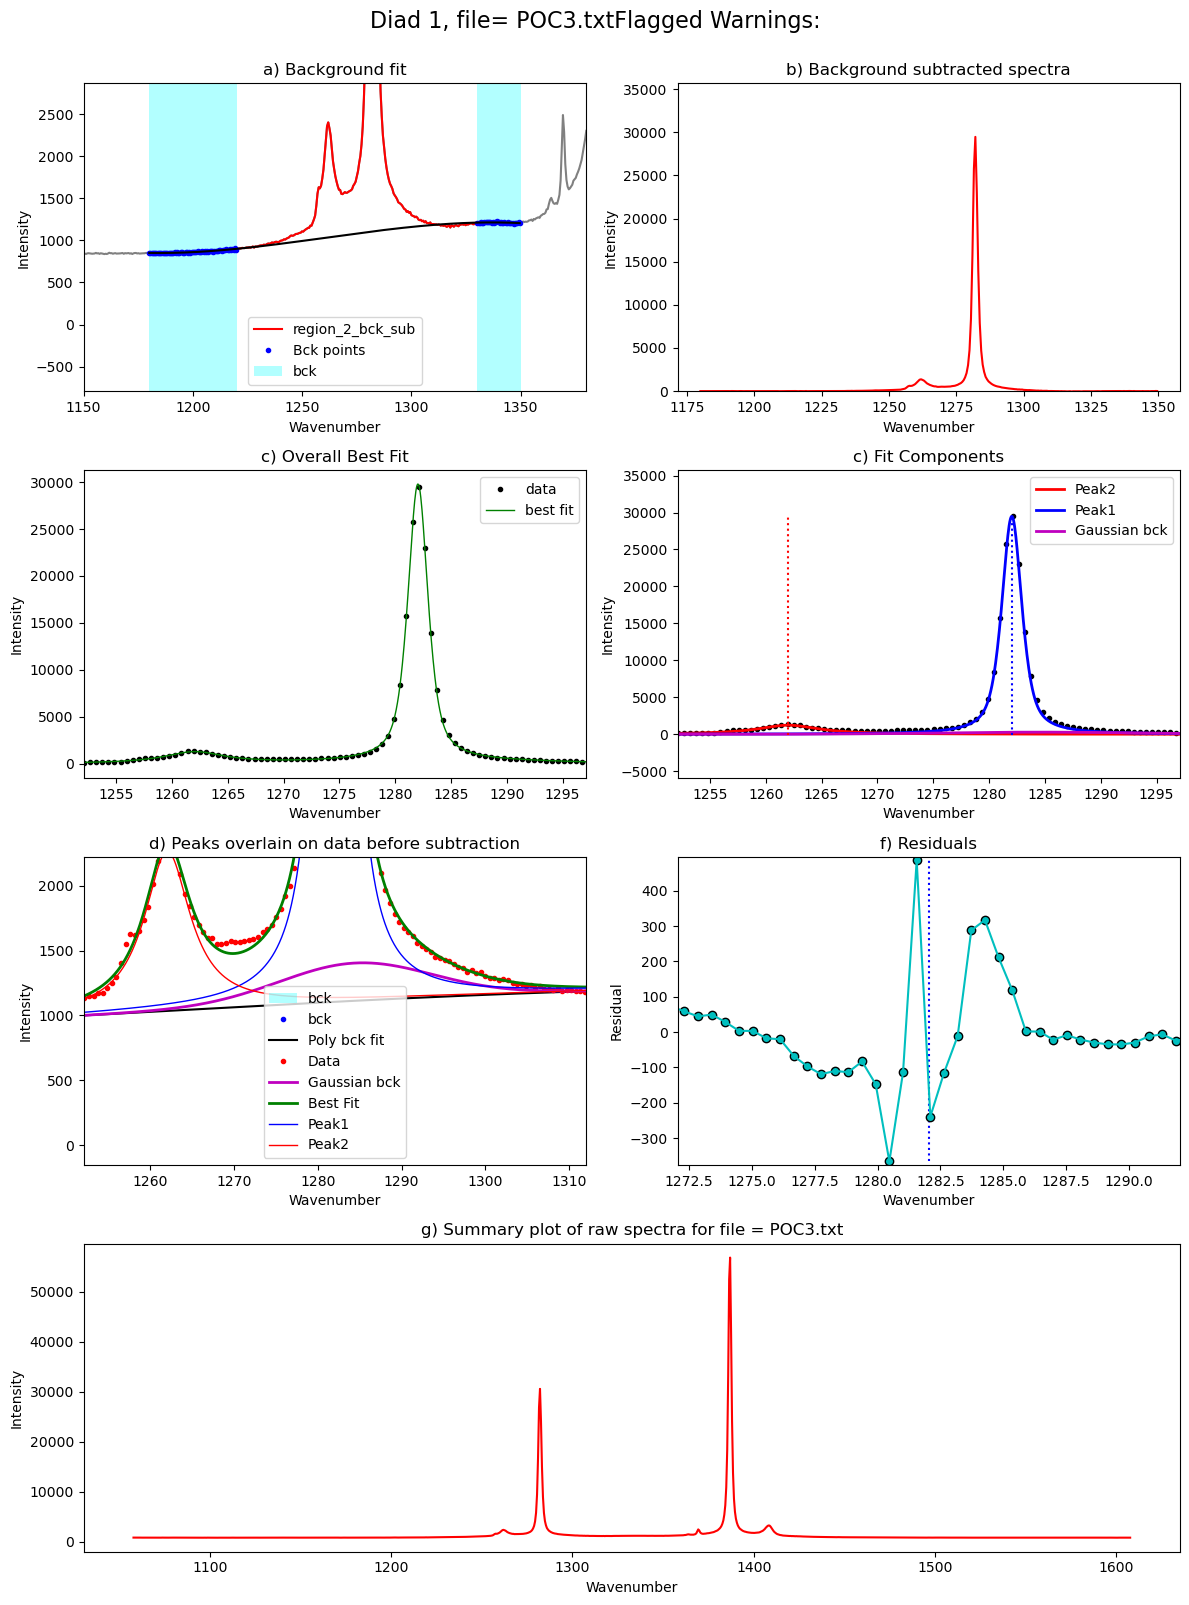

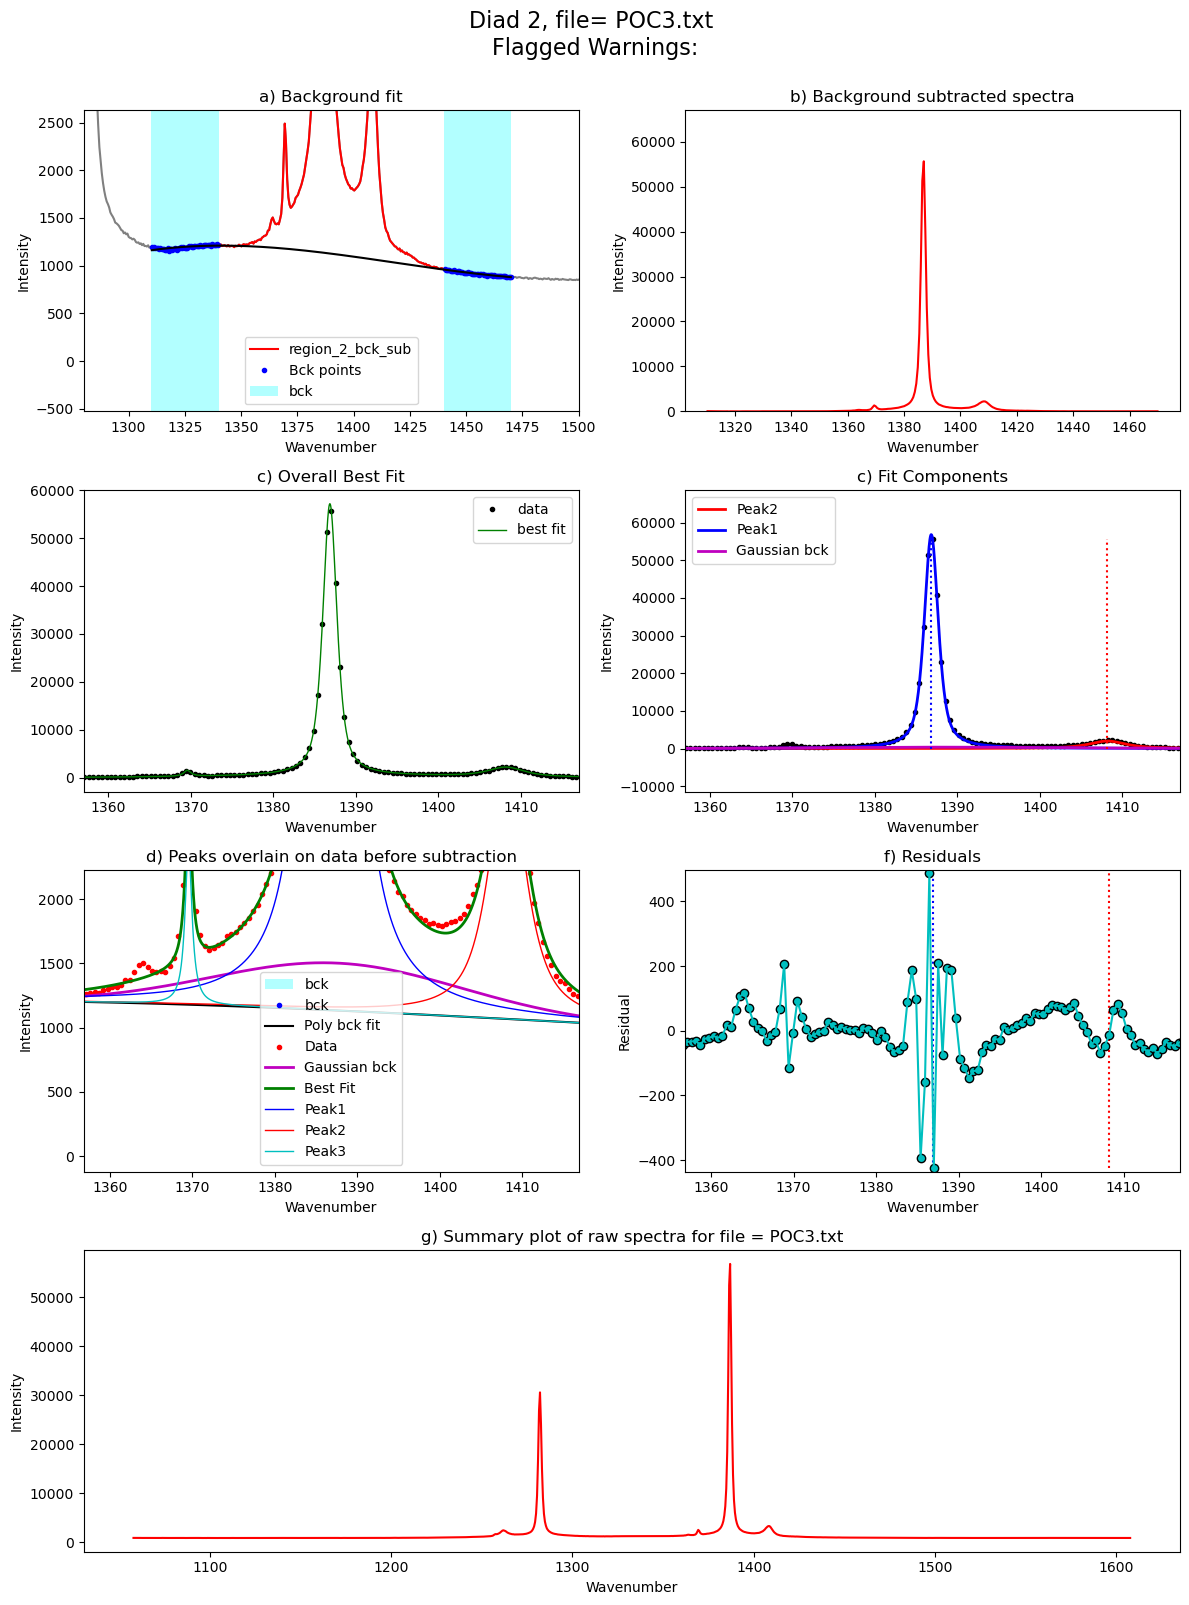

In [21]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself
to_clipboard=False # Copies to clipboard
Diad_Files_Weak_i=Diad_Files_Weak
df_Weak = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Weak))): #
    
    filename=Diad_Files_Weak[i]

    if fit_sec_peak is True:
    
        generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
filename=filename, filetype=filetype)


    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)
    
    
    if fit_sec_peak is True:
        data=pf.combine_diad_outputs(filename=filename, prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit, Carb_fit=generic_fit)
    
    else:
        data=pf.combine_diad_outputs(filename=filename, prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit)        
    
 

    df_Weak = pd.concat([df_Weak, data], axis=0)


## EXport file names that still arent happy

In [29]:
refit_d1=(df_Weak['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Weak['Diad2_refit']!='Flagged Warnings:')# (df_Weak['Diad2_refit']==True)
refit=refit_d1|refit_d2


0    POC6
Name: filename, dtype: object

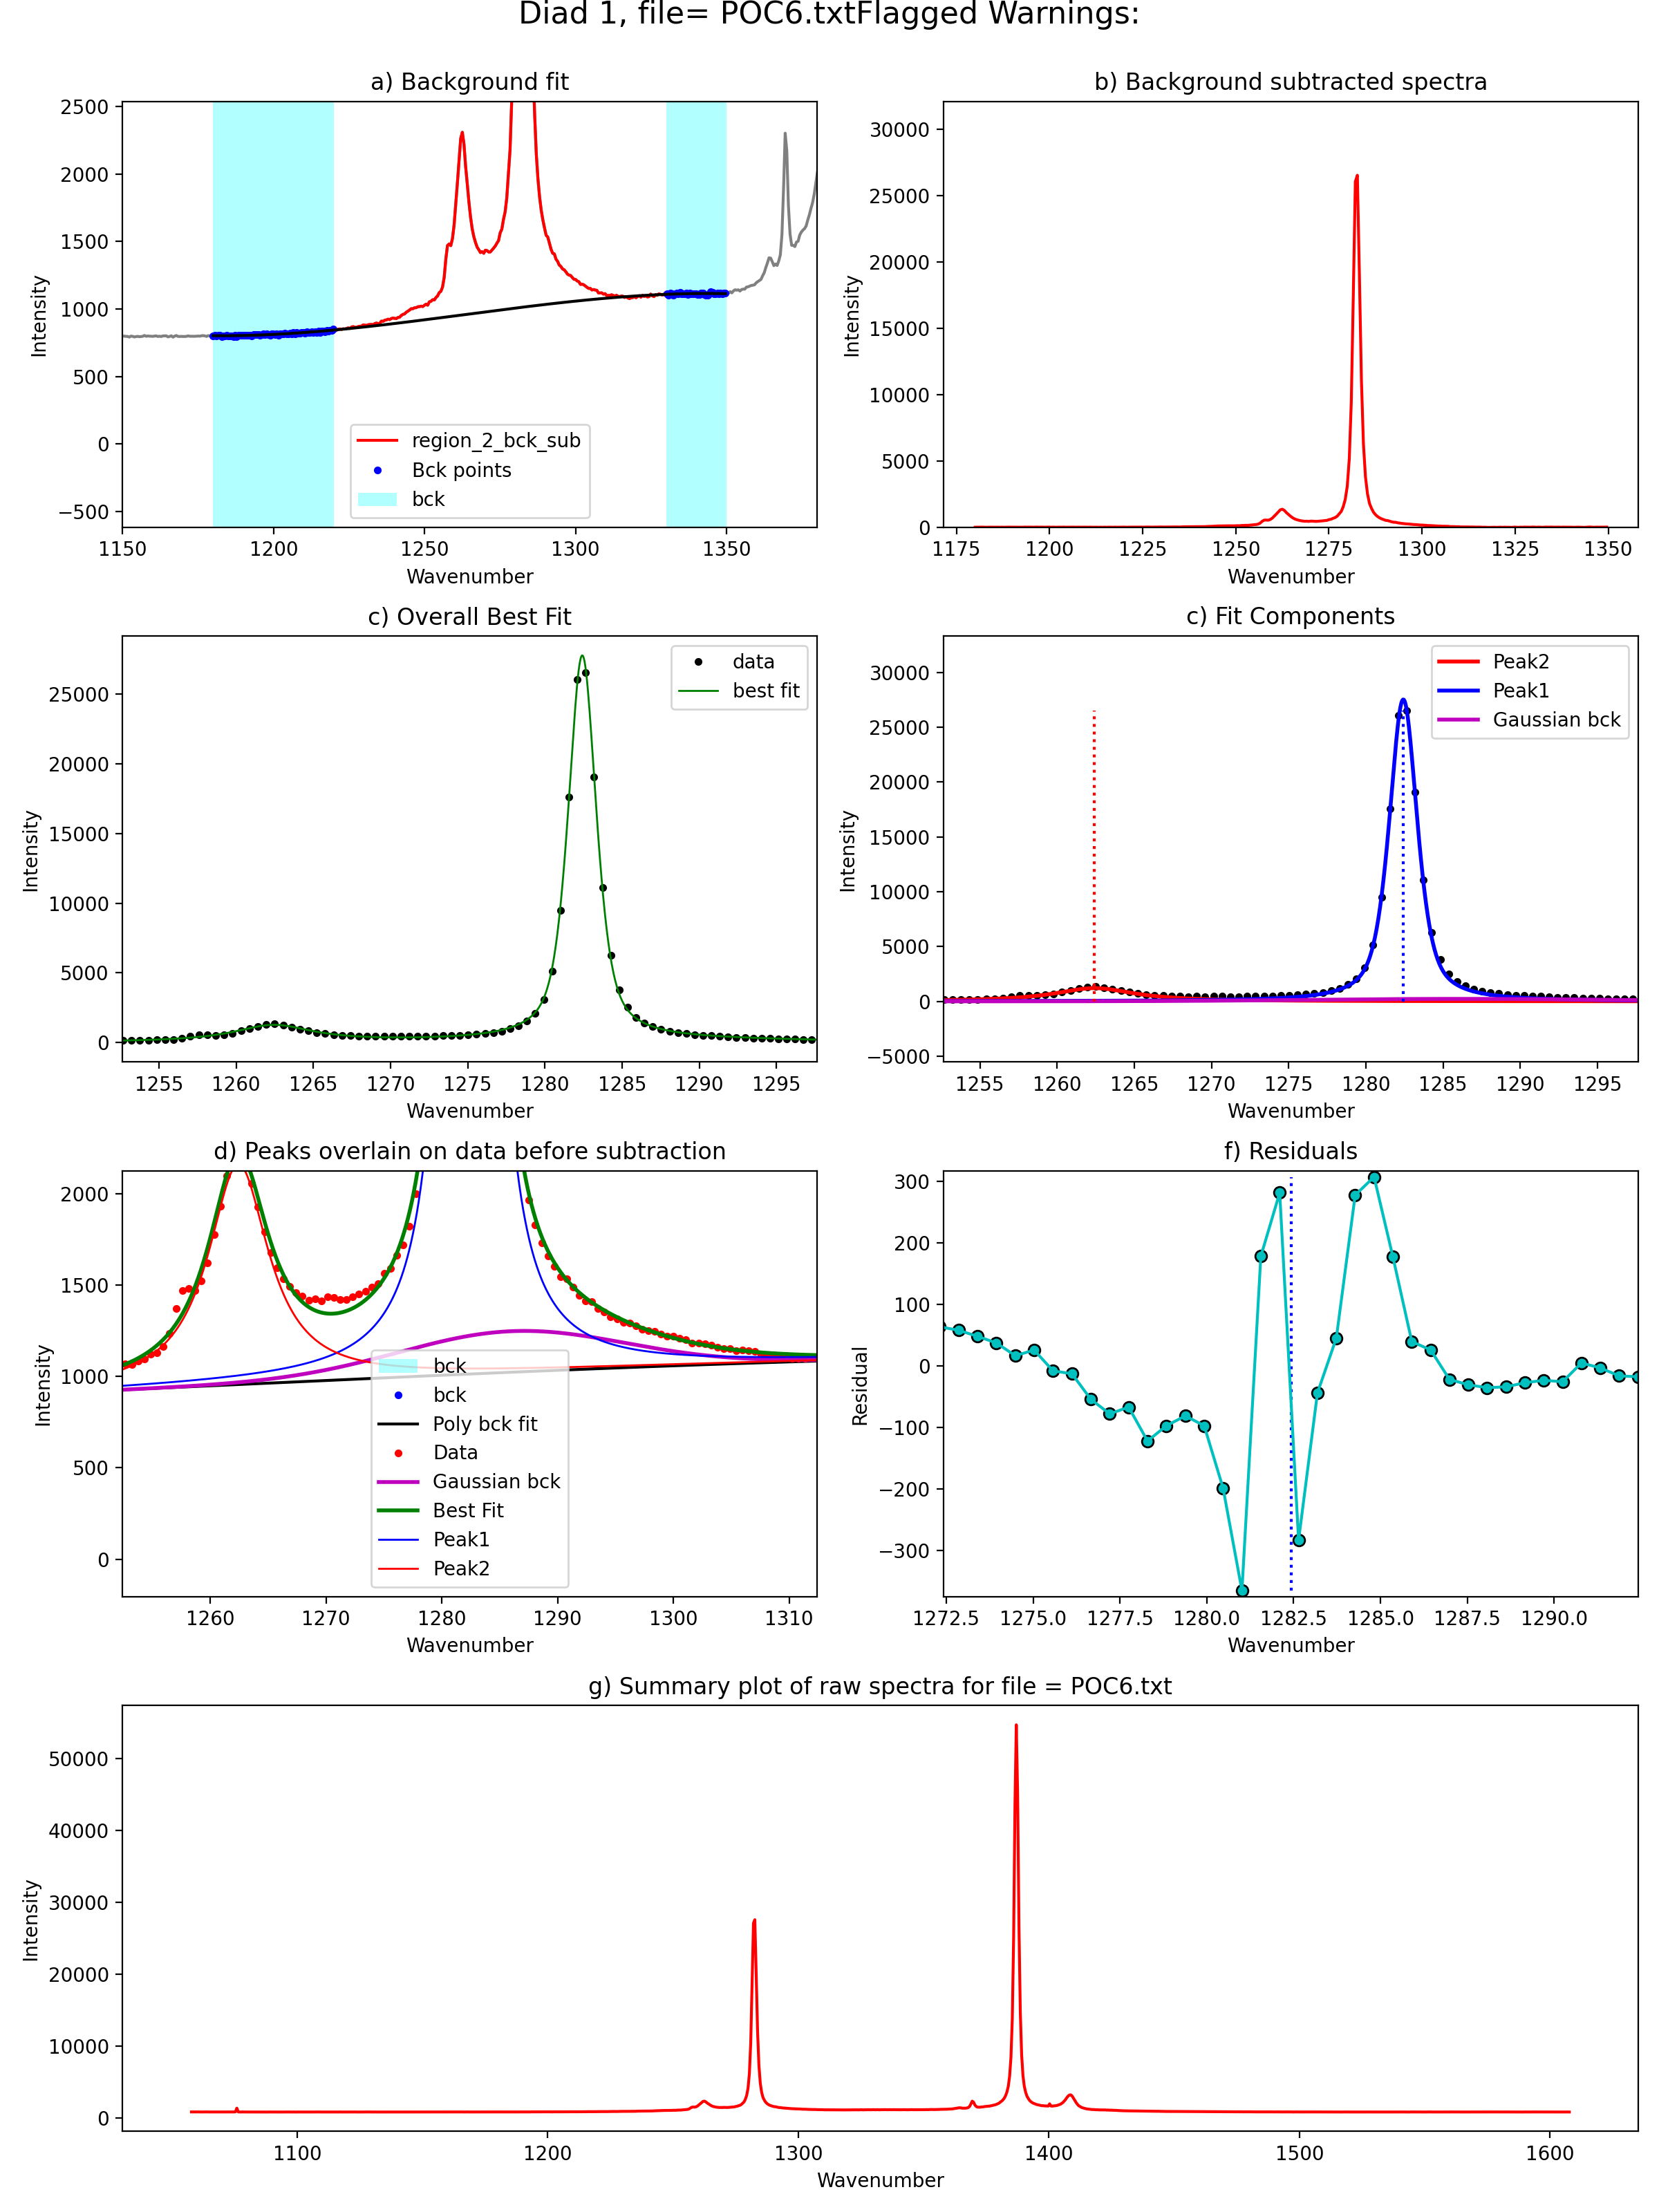

In [49]:
refit_names_1=df_Weak['filename'].loc[refit]
refit_names_1

for file in refit_names_1:
    img_diad1=spectra_path + '\\diad_fit_images'  + '\\Diad1_Fit_'+ str(file)  + '.png'
    img_diad2=spectra_path + '\\diad_fit_images'  + '\\Diad2_Fit_'+ str(file)  + '.png'
if sum(refit)>0:
    from IPython.display import Image
    Image(filename=img_diad1, width=500, height=1500) 
    from IPython.display import Image
    Image(filename=img_diad2, width=500, height=1500)     

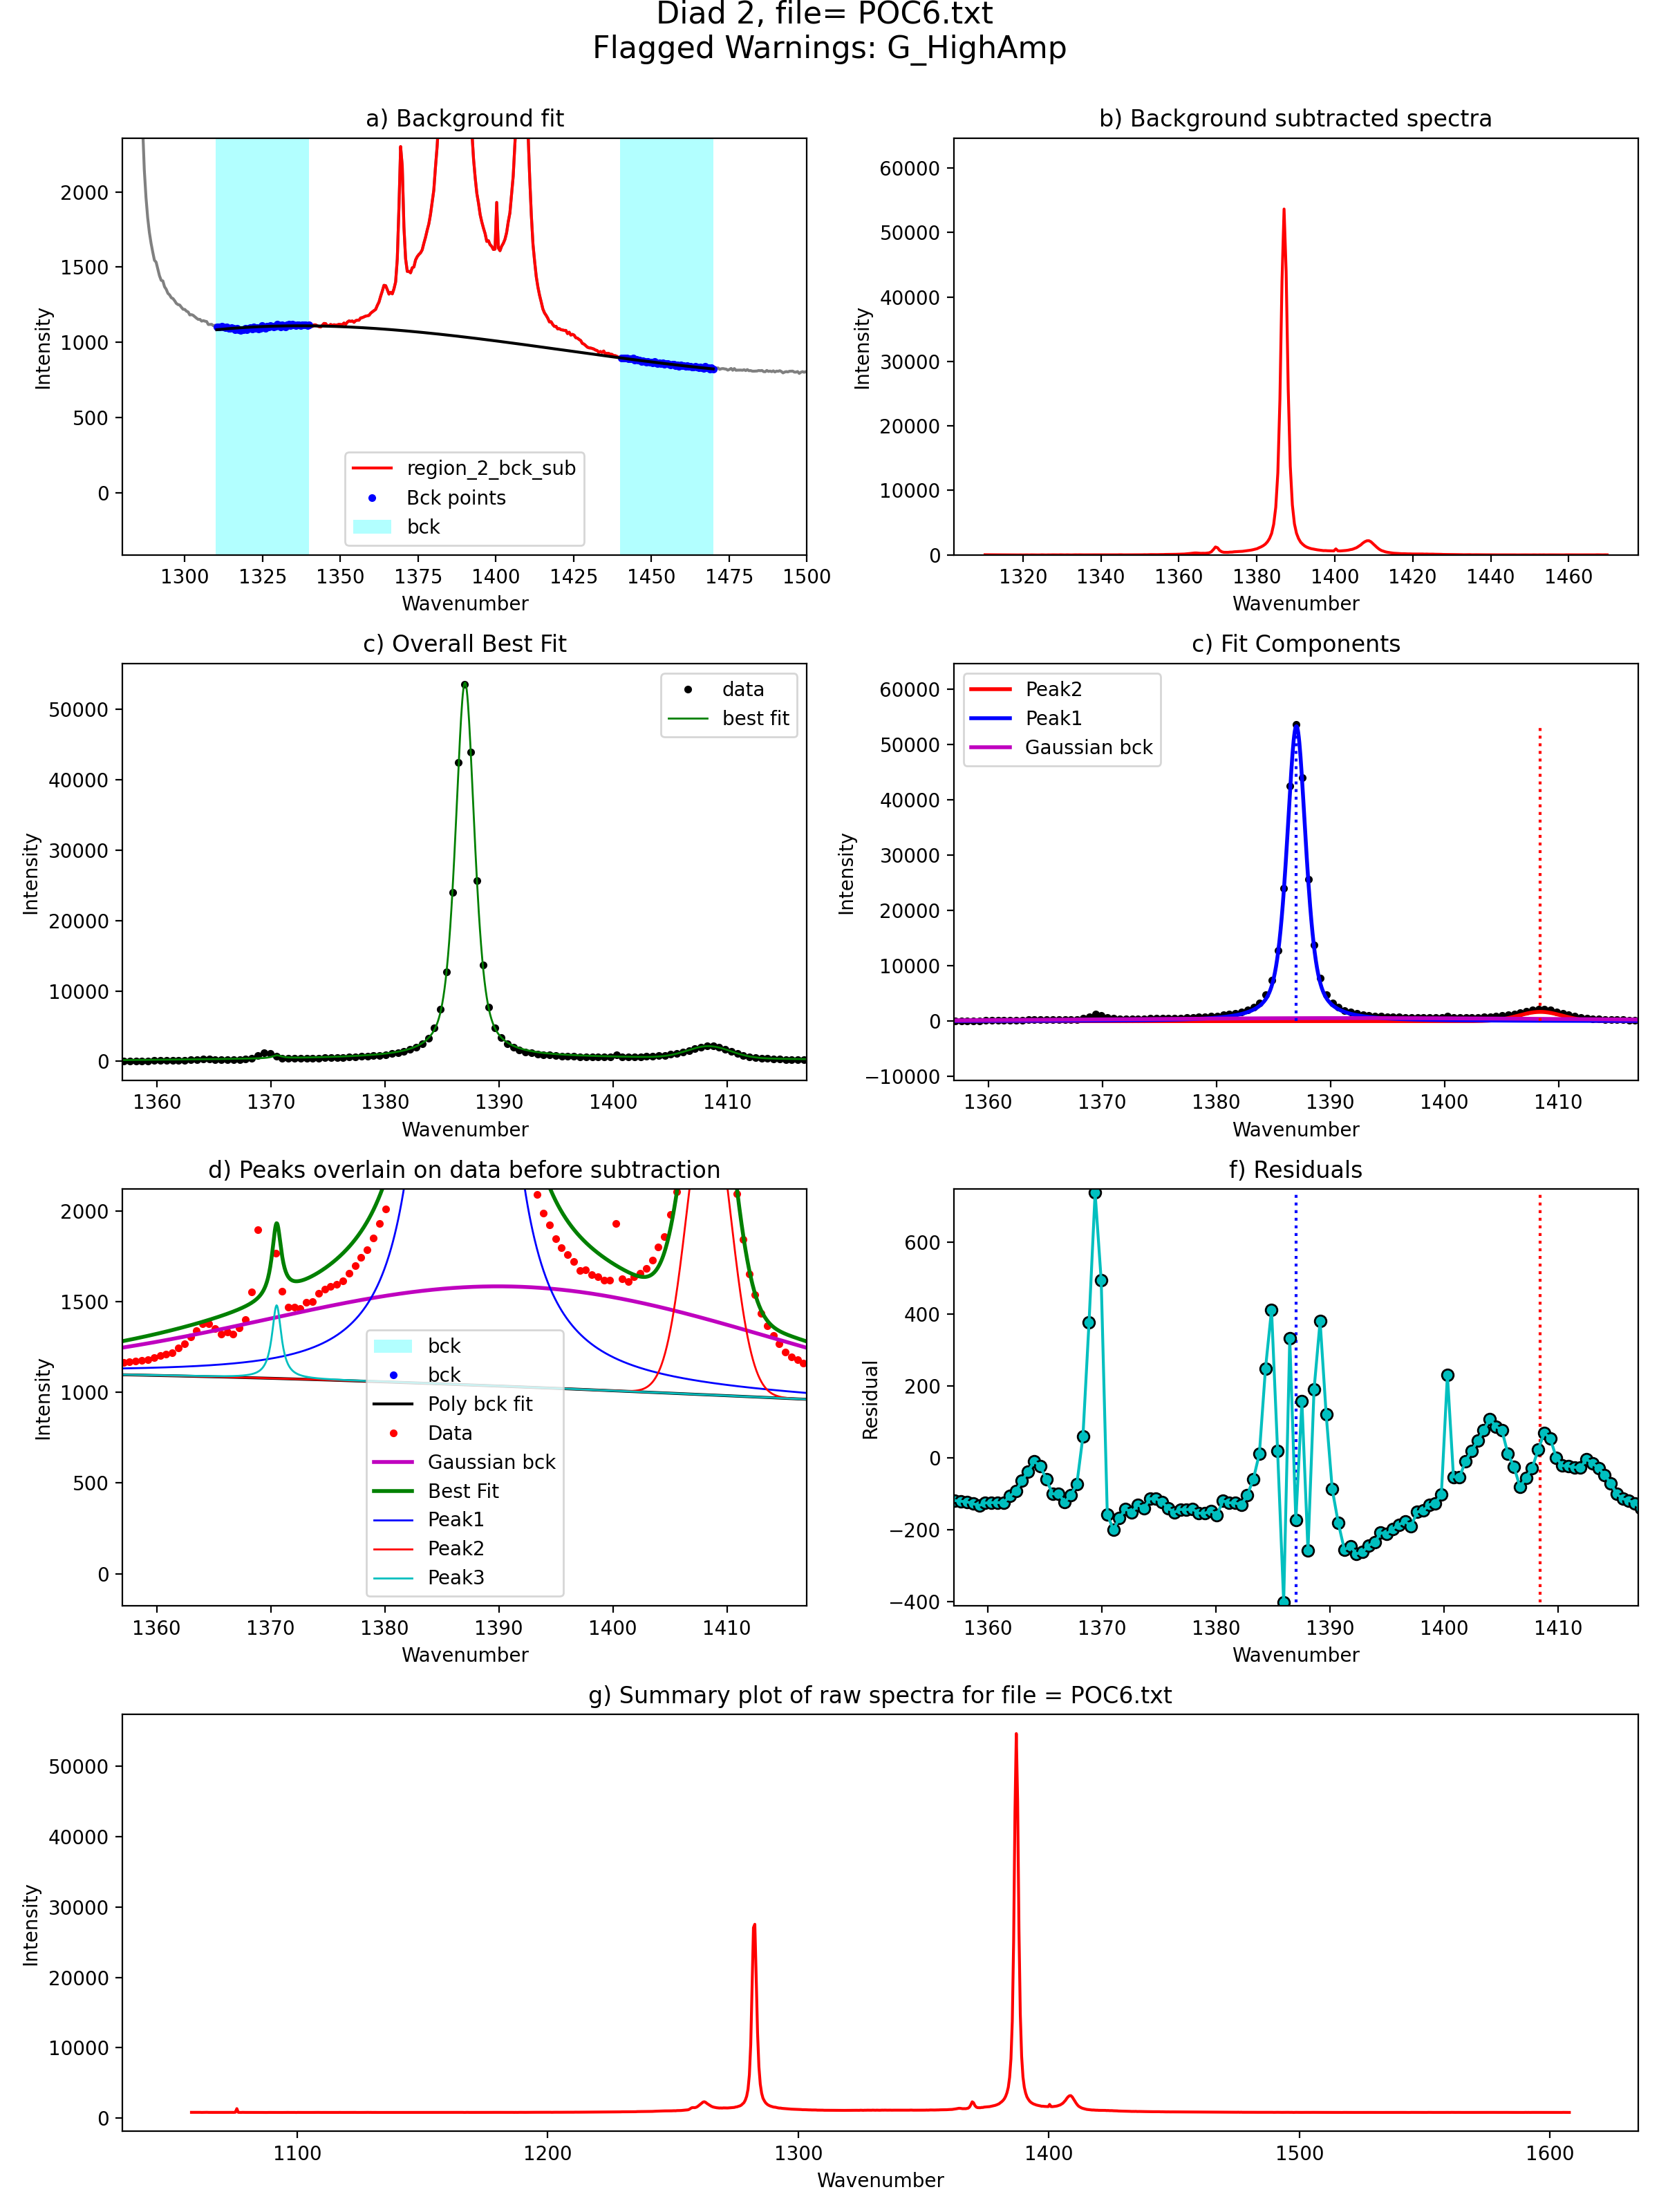

In [50]:
Image(filename=img_diad2, width=500, height=1500) 

In [ ]:

x='Splitting'
y1='Diad1_fwhm'
y2='Diad2_fwhm'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x], df_Weak[y1], 'or')
ax2.plot(df_Weak[x], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

## Here are some figures to inspect the relationship between residuals and areas etc. 

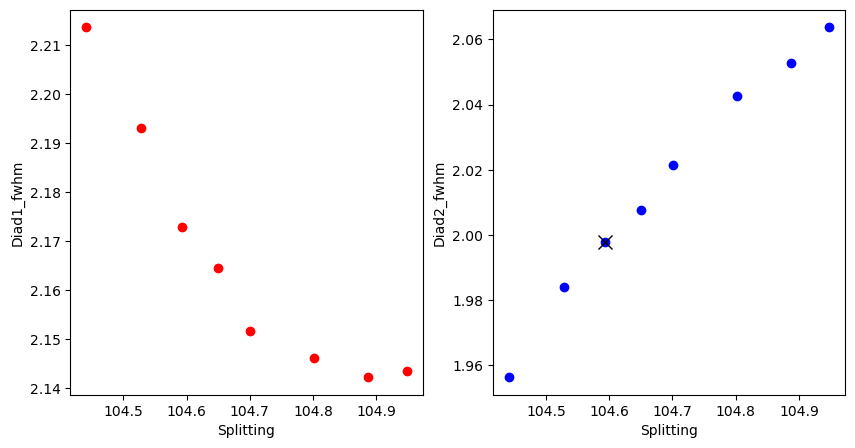

In [51]:

x='Splitting'
y1='Diad1_fwhm'
y2='Diad2_fwhm'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x], df_Weak[y1], 'or')
ax2.plot(df_Weak[x], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

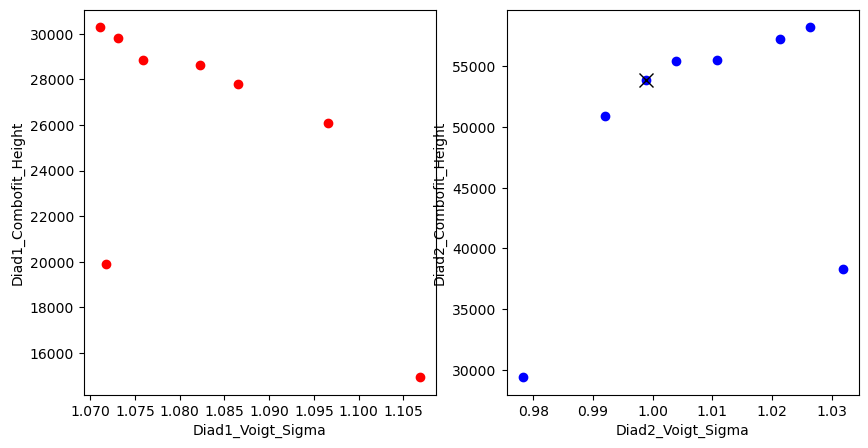

In [52]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x1], df_Weak[y1], 'or')
ax2.plot(df_Weak[x2], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x1].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x2].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

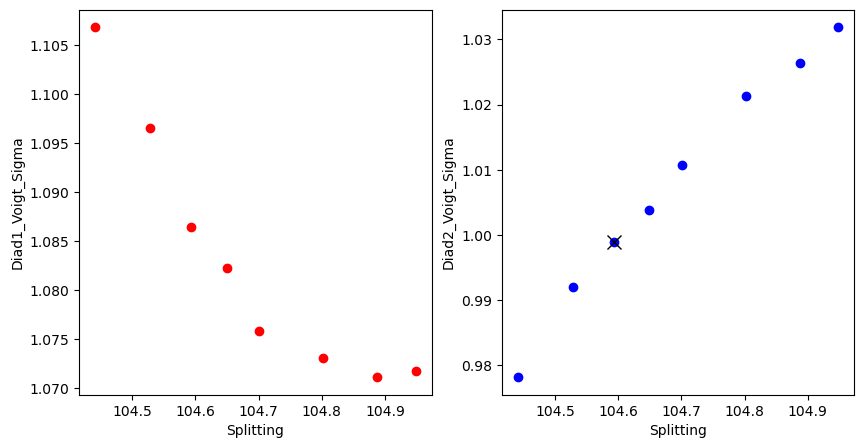

In [53]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x], df_Weak[y1], 'or')
ax2.plot(df_Weak[x], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

In [54]:
combo=df_Weak

In [55]:
combo.to_excel('strong_Diads.xlsx')

In [56]:
combo.to_clipboard(excel=True)